# BEAM - Ride Hail Fleet Size & Price Analysis
### Feb 28 2023

Plots using summary tables from latest model runs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import mplcursors
%matplotlib inline

In [2]:
# Data prep
# Summary table location: https://drive.google.com/file/d/1ErkO9GKQ95acI7iFSx9Il56Ink5ZQwCd/view?usp=share_link
# I have downloaded the CSV and manually added size and price multipliers for ease of identifying the scenarios

Importing the data

In [3]:
df_consol=pd.read_csv("summaries_condensed_28Feb.csv")

In [4]:
df_consol_t=df_consol.T

In [5]:
df=df_consol_t

In [6]:
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header

In [7]:
df.head()

Variable,Number of fleets,Total fleet size,RH Pooled Price,RH Solo Price,Simulated Agents,Trips per Agent AV,Trip Vehicle Total,Trip Est Total,Trip Mode Total,Trip Replanning Total,...,Activities AV per person atwork,Activities AV per person eatout,Activities AV per person escort,Activities AV per person othdiscr,Activities AV per person othmaint,Activities AV per person school,Activities AV per person shopping,Activities AV per person social,Activities AV per person univ,Activities AV per person work
Baseline,1,100%,100%,100%,1937432,3.837653657,17844548,7435193,7604885,169726,...,0.137838807,0.181533888,0.331747437,0.208376796,0.234005249,0.195663989,0.378355041,0.094250566,0.044597276,0.526242906
1Fl 1Pr 1Flz,2,100%,100%,100%,1937360,3.839640542,17848430,7438766,7606010,167283,...,0.137937744,0.181895416,0.331933714,0.208591063,0.23420693,0.195638866,0.37864916,0.094146272,0.044579629,0.526276535
5Fl 1Pr 1Flz,5,100%,100%,100%,1937424,3.839001685,17855388,7437774,7611958,174218,...,0.137828291,0.181651006,0.331946691,0.208309119,0.233997442,0.19568276,0.378870771,0.094238862,0.044607733,0.526228185
5Fl 1Pr 1.6Flz,5,164%,100%,100%,1937388,3.839239223,17846876,7438096,7608110,170051,...,0.137871196,0.181591917,0.331842667,0.208545733,0.23402798,0.195693893,0.37864021,0.094237189,0.044612127,0.526232226
5Fl 1Pr 2Flz,5,200%,100%,100%,1937426,3.839439545,17830954,7438630,7602653,164059,...,0.137982115,0.181856846,0.331766649,0.208518523,0.234009575,0.1956788,0.378741887,0.094186356,0.044602501,0.52617211


Metrics we want: 
- Mode splits
- VMT (including deadhead)
- Speeds by mode

How do these change with respect to:
- Price
- Fleet size

In [8]:
df['Total fleet size'] = df['Total fleet size'].str.rstrip("%").astype(float)/100

C:\Users\Administrator\AppData\Local\Temp\2\ipykernel_3440\1238175916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total fleet size'] = df['Total fleet size'].str.rstrip("%").astype(float)/100


In [9]:
df['RH Pooled Price'] = df['RH Pooled Price'].str.rstrip("%").astype(float)/100

C:\Users\Administrator\AppData\Local\Temp\2\ipykernel_3440\189134848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RH Pooled Price'] = df['RH Pooled Price'].str.rstrip("%").astype(float)/100


In [10]:
df['Price Multiplier'] = df['RH Pooled Price']

C:\Users\Administrator\AppData\Local\Temp\2\ipykernel_3440\3037397672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price Multiplier'] = df['RH Pooled Price']


In [11]:
df['RH Solo Price'] = df['RH Solo Price'].str.rstrip("%").astype(float)/100

C:\Users\Administrator\AppData\Local\Temp\2\ipykernel_3440\897718526.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RH Solo Price'] = df['RH Solo Price'].str.rstrip("%").astype(float)/100


In [12]:
df['Size Multiplier'] = df['Total fleet size']

C:\Users\Administrator\AppData\Local\Temp\2\ipykernel_3440\3203114257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Size Multiplier'] = df['Total fleet size']


In [13]:
df = df.apply(pd.to_numeric, errors='coerce')

In [14]:
df.dtypes

Variable
Number of fleets                     int64
Total fleet size                   float64
RH Pooled Price                    float64
RH Solo Price                      float64
Simulated Agents                     int64
                                    ...   
Activities AV per person social    float64
Activities AV per person univ      float64
Activities AV per person work      float64
Price Multiplier                   float64
Size Multiplier                    float64
Length: 4733, dtype: object

In [15]:
df['Trip Mode Share Transit'] = df['Trip Mode Share Walk-Transit'] +df['Trip Mode Share Drive-Transit'] + df['Trip Mode Share Bike-Transit']
#df['Trip Mode Share Rail']
#df['Trip Mode Share Car']
#df['Trip Mode Share HOV3 Passenger']
#df['Trip Mode Share Bike']
#df['Trip Mode Share HOV2 Passenger']
#df['Trip Mode Share Walk']
#df['Trip Mode Share HOV2 Driver']
#df['Trip Mode Share HOV3 Driver']
#df['Trip Mode Share Walk-Transit']
#df['Trip Mode Share Ride Hail']
#df['Trip Mode Share Ride Hail-Transit']
#df['Trip Mode Share Ride Hail Pooled']
#df['Trip Mode Share Drive-Transit']
#df['Trip Mode Share Cable Car']
#df['Trip Mode Share Bike-Transit']

In [16]:
df['Trip Mode Share Drive Modes'] = df['Trip Mode Share Car'] + df['Trip Mode Share HOV2 Driver'] + df['Trip Mode Share HOV3 Driver']

In [17]:
df['Trip Mode Share Ride Hail Total'] = df['Trip Mode Share Ride Hail Pooled'] + df['Trip Mode Share Ride Hail']

In [18]:
df['Trip Exec Share Ride Hail Total'] = df['Trip Exec Share Ride Hail'] + df['Trip Exec Share Ride Hail Pooled']

In [19]:
df

Variable,Number of fleets,Total fleet size,RH Pooled Price,RH Solo Price,Simulated Agents,Trips per Agent AV,Trip Vehicle Total,Trip Est Total,Trip Mode Total,Trip Replanning Total,...,Activities AV per person shopping,Activities AV per person social,Activities AV per person univ,Activities AV per person work,Price Multiplier,Size Multiplier,Trip Mode Share Transit,Trip Mode Share Drive Modes,Trip Mode Share Ride Hail Total,Trip Exec Share Ride Hail Total
Baseline,1,1.00,1.0000,1.0000,1937432,3.837654,17844548,7435193,7604885,169726,...,0.378355,0.094251,0.044597,0.526243,1.0000,1.00,0.072285,0.672569,0.024793,0.014730
1Fl 1Pr 1Flz,2,1.00,1.0000,1.0000,1937360,3.839641,17848430,7438766,7606010,167283,...,0.378649,0.094146,0.044580,0.526277,1.0000,1.00,0.072425,0.671982,0.025073,0.015413
5Fl 1Pr 1Flz,5,1.00,1.0000,1.0000,1937424,3.839002,17855388,7437774,7611958,174218,...,0.378871,0.094239,0.044608,0.526228,1.0000,1.00,0.072282,0.672845,0.024715,0.013942
5Fl 1Pr 1.6Flz,5,1.64,1.0000,1.0000,1937388,3.839239,17846876,7438096,7608110,170051,...,0.378640,0.094237,0.044612,0.526232,1.0000,1.64,0.072138,0.669025,0.030981,0.021029
5Fl 1Pr 2Flz,5,2.00,1.0000,1.0000,1937426,3.839440,17830954,7438630,7602653,164059,...,0.378742,0.094186,0.044603,0.526172,1.0000,2.00,0.071860,0.666670,0.033842,0.024548
5Fl 1Pr 4Flz,5,4.00,1.0000,1.0000,1937273,3.842128,17807999,7443250,7579169,135955,...,0.379268,0.094342,0.044621,0.526333,1.0000,4.00,0.070900,0.660129,0.042047,0.036367
5Fl 1Pr 10Flz,5,10.00,1.0000,1.0000,1937346,3.842776,17819919,7444787,7548422,103680,...,0.379292,0.094238,0.044692,0.526469,1.0000,10.00,0.069262,0.655013,0.048307,0.046166
2Fl 1Pr 1.6Flz,2,1.64,1.0000,1.0000,1937567,3.839957,17832089,7440173,7604317,164177,...,0.378811,0.094183,0.044638,0.526276,1.0000,1.64,0.072015,0.668026,0.031389,0.022246
2Fl 1Pr 2Flz,2,2.00,1.0000,1.0000,1937443,3.838790,17815656,7437437,7595005,157614,...,0.378554,0.094049,0.044626,0.526273,1.0000,2.00,0.071703,0.665698,0.033915,0.025577
2Fl 1Pr 4Flz,2,4.00,1.0000,1.0000,1937386,3.842638,17800479,7444674,7575283,130632,...,0.378821,0.094295,0.044630,0.526353,1.0000,4.00,0.070554,0.659643,0.042050,0.036874


In [20]:
df['Car_Exec_Total']=df['Trip Exec Share Car'] + df['Trip Exec Share HOV3 Passenger'] + df['Trip Exec Share HOV2 Passenger'] + df['Trip Exec Share HOV2 Driver'] + df['Trip Exec Share HOV3 Driver']

df['Transit_Exec_Total']=df['Trip Exec Share Walk-Transit'] + df['Trip Exec Share Drive-Transit']+ df['Trip Exec Share Bike-Transit'] + df['Trip Mode Share Bike-Transit']

In [21]:
df['Bus_Diff']=df['Trip Exec Share Bus']-df['Trip Mode Share Bus']

df['Subway_Diff']=df['Trip Exec Share Subway']-df['Trip Mode Share Subway']

df['Tram_Diff']=df['Trip Exec Share Tram']-df['Trip Mode Share Tram']

df['Rail_Diff']=df['Trip Exec Share Rail']-df['Trip Mode Share Rail']

df['Car_Diff']=df['Trip Exec Share Car']-df['Trip Mode Share Car']

df['HOV3 Passenger_Diff']=df['Trip Exec Share HOV3 Passenger']-df['Trip Mode Share HOV3 Passenger']

df['Bike_Diff']=df['Trip Exec Share Bike']-df['Trip Mode Share Bike']

df['HOV2 Passenger_Diff']=df['Trip Exec Share HOV2 Passenger']-df['Trip Mode Share HOV2 Passenger']

df['Walk_Diff']=df['Trip Exec Share Walk']-df['Trip Mode Share Walk']

df['HOV2 Driver_Diff']=df['Trip Exec Share HOV2 Driver']-df['Trip Mode Share HOV2 Driver']

df['HOV3 Driver_Diff']=df['Trip Exec Share HOV3 Driver']-df['Trip Mode Share HOV3 Driver']

df['Walk-Transit_Diff']=df['Trip Exec Share Walk-Transit']-df['Trip Mode Share Walk-Transit']

df['Ride Hail_Diff']=df['Trip Exec Share Ride Hail']-df['Trip Mode Share Ride Hail']

df['Ride Hail-Transit_Diff']=df['Trip Exec Share Ride Hail-Transit']-df['Trip Mode Share Ride Hail-Transit']

df['Ride Hail Pooled_Diff']=df['Trip Exec Share Ride Hail Pooled']-df['Trip Mode Share Ride Hail Pooled']

df['Drive-Transit_Diff']=df['Trip Exec Share Drive-Transit']-df['Trip Mode Share Drive-Transit']

df['Cable Car_Diff']=df['Trip Exec Share Cable Car']-df['Trip Mode Share Cable Car']

df['Bike-Transit_Diff']=df['Trip Exec Share Bike-Transit']-df['Trip Mode Share Bike-Transit']

## Plots for presentation

In [22]:
df['Car_Diff']

Baseline               0.011804
1Fl 1Pr 1Flz           0.011618
5Fl 1Pr 1Flz           0.012122
5Fl 1Pr 1.6Flz         0.011748
5Fl 1Pr 2Flz           0.011291
5Fl 1Pr 4Flz           0.009228
5Fl 1Pr 10Flz          0.006964
2Fl 1Pr 1.6Flz         0.011318
2Fl 1Pr 2Flz           0.010828
2Fl 1Pr 4Flz           0.008860
2Fl 1Pr 10Flz          0.006709
2Fl .47Pr 1Flz         0.014711
5Fl .47Pr 1Flz         0.015259
5Fl .47Pr 1.6Flz       0.015146
5Fl .47Pr 2Flz         0.014638
5Fl .47Pr 4Flz         0.012064
5Fl .47Pr 10Flz        0.008126
2Fl .27Pr 1Flz         0.017110
5Fl .27Pr 1Flz         0.017603
5Fl .27Pr 1.6Flz       0.017848
5Fl .27Pr 2Flz         0.017549
5Fl .27Pr 4Flz         0.015026
5Fl .27Pr 10Flz        0.009785
2Fl .125Pr 1Flz        0.020661
5Fl .125Pr 1Flz        0.020987
5Fl .125Pr 1.6Flz      0.021323
5Fl .125Pr 2Flz        0.021229
5Fl .125Pr 4Flz        0.018870
5Fl .125Pr 10Flz       0.012226
2Fl .0625Pr 1Flz       0.023023
5Fl .0625Pr 1Flz       0.023349
5Fl .062

In [23]:
df['Car Modes_Diff'] =  df['Car_Diff'] + df['HOV3 Passenger_Diff'] + df['HOV2 Passenger_Diff'] + df['HOV2 Driver_Diff'] + df['HOV3 Driver_Diff']

In [24]:
df['Car Modes_Diff']

Baseline                0.018998
1Fl 1Pr 1Flz            0.018705
5Fl 1Pr 1Flz            0.019491
5Fl 1Pr 1.6Flz          0.018946
5Fl 1Pr 2Flz            0.018225
5Fl 1Pr 4Flz            0.014978
5Fl 1Pr 10Flz           0.011356
2Fl 1Pr 1.6Flz          0.018269
2Fl 1Pr 2Flz            0.017494
2Fl 1Pr 4Flz            0.014379
2Fl 1Pr 10Flz           0.010946
2Fl .47Pr 1Flz          0.023627
5Fl .47Pr 1Flz          0.024497
5Fl .47Pr 1.6Flz        0.024367
5Fl .47Pr 2Flz          0.023572
5Fl .47Pr 4Flz          0.019583
5Fl .47Pr 10Flz         0.013325
2Fl .27Pr 1Flz          0.027416
5Fl .27Pr 1Flz          0.028169
5Fl .27Pr 1.6Flz        0.028626
5Fl .27Pr 2Flz          0.028194
5Fl .27Pr 4Flz          0.024354
5Fl .27Pr 10Flz         0.016095
2Fl .125Pr 1Flz         0.032967
5Fl .125Pr 1Flz         0.033469
5Fl .125Pr 1.6Flz       0.034049
5Fl .125Pr 2Flz         0.033960
5Fl .125Pr 4Flz         0.030446
5Fl .125Pr 10Flz        0.020117
2Fl .0625Pr 1Flz        0.036604
5Fl .0625P

In [25]:
df.drop(columns=['HOV3 Passenger_Diff','HOV3 Driver_Diff', 'HOV2 Passenger_Diff', 'HOV2 Driver_Diff', 'Car_Diff'], axis=1, inplace=True)

In [26]:
df.drop(columns=['Cable Car_Diff','Bus_Diff', 'Subway_Diff', 'Tram_Diff', 'Rail_Diff'], axis=1, inplace=True)

## Summary for DataLens spreadsheet

In [87]:
df.columns

Index(['Number of fleets', 'Total fleet size', 'RH Pooled Price',
       'RH Solo Price', 'Simulated Agents ', 'Trips per Agent AV ',
       'Trip Vehicle Total ', 'Trip Est Total ', 'Trip Mode Total ',
       'Trip Replanning Total ',
       ...
       'Transit_Exec_Total', 'Bike_Diff', 'Walk_Diff', 'Walk-Transit_Diff',
       'Ride Hail_Diff', 'Ride Hail-Transit_Diff', 'Ride Hail Pooled_Diff',
       'Drive-Transit_Diff', 'Bike-Transit_Diff', 'Car Modes_Diff'],
      dtype='object', name='Variable', length=4748)

In [88]:
df['Pooling Success Rate'] = df['Trip Exec Share Ride Hail Pooled']/df['Trip Mode Share Ride Hail Pooled']

In [94]:
df_table=df.loc[:,['Length VehicleSUM [km]',
'Pooling Success Rate',
'Car_Exec_Total',
'Transit_Exec_Total',
'Trip Exec Share Bike',
'Trip Exec Share Walk',
'Trip Exec Share Ride Hail',
'Trip Exec Share Ride Hail Pooled',
'Energy VehicleSUM [GJ]',
'Energy Vehicle SUM Walk [GJ]',
'Energy Vehicle SUM Bike [GJ]',
'Energy Vehicle SUM Car [GJ]',
'Energy Vehicle SUM Car Emergency [GJ]',
'Energy Vehicle SUM Car HOV2 Emergency [GJ]',
'Energy Vehicle SUM Car HOV3 Emergency [GJ]',
'Energy Vehicle SUM Ride Hail [GJ]',
'Energy Vehicle SUM Empty Ride Hail [GJ]',
'Energy Vehicle SUM Car HOV2 [GJ]',
'Energy Vehicle SUM Car HOV3 [GJ]',
'Energy Vehicle SUM Bus [GJ]',
'Energy Vehicle SUM Empty Bus [GJ]',
'Length Vehicle SUM Empty Ride Hail [km]']]

In [95]:
df_table.to_csv('data_table.csv')

In [27]:
# Baseline_price and baseline_size dataframes

In [28]:
constant_price = df[df['Price Multiplier'] == 1]

In [29]:
constant_size = df[df['Size Multiplier'] == 1]

In [30]:
constant_size = constant_size.sort_values(by=['Price Multiplier'])

In [31]:
constant_price = constant_price.sort_values(by=['Size Multiplier'])

In [32]:
constant_size

Variable,Number of fleets,Total fleet size,RH Pooled Price,RH Solo Price,Simulated Agents,Trips per Agent AV,Trip Vehicle Total,Trip Est Total,Trip Mode Total,Trip Replanning Total,...,Transit_Exec_Total,Bike_Diff,Walk_Diff,Walk-Transit_Diff,Ride Hail_Diff,Ride Hail-Transit_Diff,Ride Hail Pooled_Diff,Drive-Transit_Diff,Bike-Transit_Diff,Car Modes_Diff
1Fl MixPr 1Flz,1,1.0,0.0000,1.0000,1938424,3.838711,17864700,7441049,7746524,305605,...,0.070227,0.000583,0.002606,-0.012701,-0.008243,0,-0.015050,-0.000042,-0.000021,0.032868
2Fl MixPr 1Flz,2,1.0,0.0000,1.0000,1938357,3.837848,17873488,7439119,7742081,303077,...,0.070060,0.000579,0.002530,-0.012720,-0.008855,0,-0.014165,-0.000041,-0.000025,0.032697
5Fl MixPr 1Flz,5,1.0,0.0000,1.0000,1938354,3.836122,17859926,7435762,7733604,297979,...,0.069610,0.000571,0.002486,-0.012763,-0.009535,0,-0.012933,-0.000033,-0.000027,0.032234
2Fl .0625Pr 1Flz,2,1.0,0.0625,0.0625,1938580,3.837229,17871768,7438775,7780743,342066,...,0.070747,0.000673,0.002970,-0.012656,-0.023270,0,-0.004230,-0.000054,-0.000038,0.036604
5Fl .0625Pr 1Flz,5,1.0,0.0625,0.0625,1938354,3.838053,17887825,7439506,7786066,346660,...,0.071080,0.000686,0.002977,-0.012305,-0.024570,0,-0.003813,-0.000042,-0.000034,0.037101
2Fl .125Pr 1Flz,2,1.0,0.1250,0.1250,1938015,3.836920,17865177,7436009,7740360,304397,...,0.068716,0.000592,0.002504,-0.011994,-0.020042,0,-0.003954,-0.000046,-0.000027,0.032967
5Fl .125Pr 1Flz,5,1.0,0.1250,0.1250,1938077,3.838608,17879651,7439518,7748732,309281,...,0.069232,0.000606,0.002529,-0.011986,-0.020918,0,-0.003636,-0.000037,-0.000028,0.033469
2Fl .27Pr 1Flz,2,1.0,0.2700,0.2700,1937733,3.838557,17843566,7438098,7688302,250239,...,0.066671,0.000477,0.002000,-0.011298,-0.014190,0,-0.004347,-0.000037,-0.000021,0.027416
5Fl .27Pr 1Flz,5,1.0,0.2700,0.2700,1937687,3.837416,17846212,7435711,7692735,257065,...,0.066535,0.000492,0.002061,-0.011343,-0.015423,0,-0.003901,-0.000038,-0.000018,0.028169
2Fl .47Pr 1Flz,2,1.0,0.4700,0.4700,1937519,3.838391,17847946,7436956,7650461,213546,...,0.064584,0.000406,0.001659,-0.010950,-0.010717,0,-0.003968,-0.000037,-0.000020,0.023627


In [33]:
constant_size['Trip Mode Share Ride Hail Total']

1Fl MixPr 1Flz      0.039594
2Fl MixPr 1Flz      0.038776
5Fl MixPr 1Flz      0.037386
2Fl .0625Pr 1Flz    0.041880
5Fl .0625Pr 1Flz    0.042347
2Fl .125Pr 1Flz     0.038773
5Fl .125Pr 1Flz     0.038750
2Fl .27Pr 1Flz      0.033803
5Fl .27Pr 1Flz      0.033806
2Fl .47Pr 1Flz      0.029970
5Fl .47Pr 1Flz      0.030079
Baseline            0.024793
1Fl 1Pr 1Flz        0.025073
5Fl 1Pr 1Flz        0.024715
Name: Trip Mode Share Ride Hail Total, dtype: float64

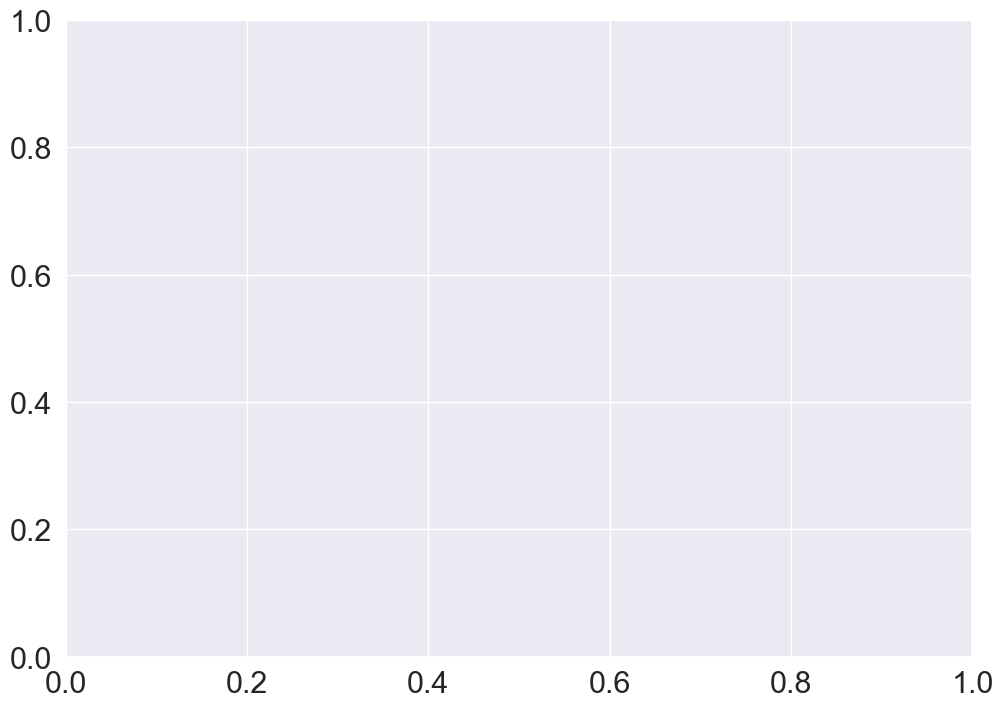

In [34]:
from matplotlib.ticker import StrMethodFormatter
import matplotlib.ticker as ticker
sns.set_style("whitegrid",{ "grid.linestyle": ":"})
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.rc('legend', fontsize= 22)
plt.rc('xtick', labelsize= 22)    # fontsize of the tick labels
plt.rc('ytick', labelsize= 22)    # fontsize of the tick labels
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}')) # 2 significant figures
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}')) 

In [35]:
s1 = 22
m1 = 16

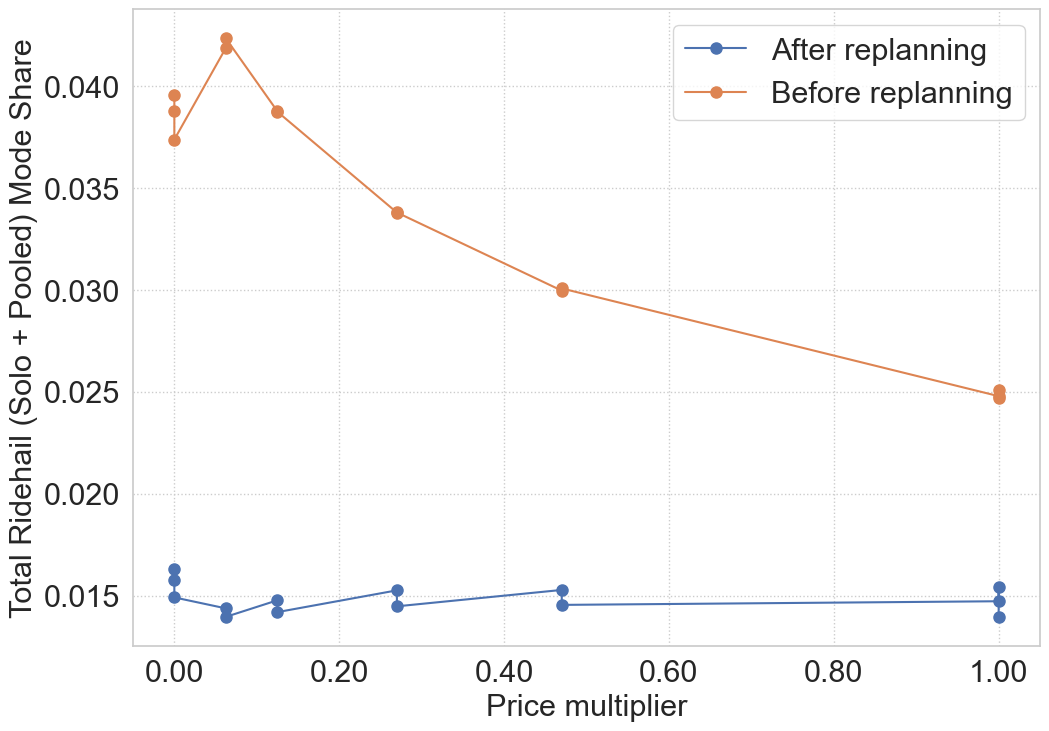

In [36]:
x=constant_size['Price Multiplier']
y=constant_size['Trip Exec Share Ride Hail Total']
z=constant_size['Trip Mode Share Ride Hail Total']

sns.set_style("whitegrid",{ "grid.linestyle": ":"})
plt.rc('legend', fontsize= 22)
plt.rc('xtick', labelsize= 22)    # fontsize of the tick labels
plt.rc('ytick', labelsize= 22)    # fontsize of the tick labels
#plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places

# multiple lines with legend
plt.plot(x,y, marker='.', markersize = m1, label= 'After replanning')
plt.plot(x,z, marker='.', markersize = m1, label = 'Before replanning')
plt.ylabel("Total Ridehail (Solo + Pooled) Mode Share", size = s1)
plt.xlabel("Price multiplier", size = s1)
#plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8])
plt.savefig('mode_shares/rh_replan.eps')
plt.legend();

In [37]:
constant_size['Price Multiplier'].value_counts()

0.0000    3
1.0000    3
0.0625    2
0.1250    2
0.2700    2
0.4700    2
Name: Price Multiplier, dtype: int64

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


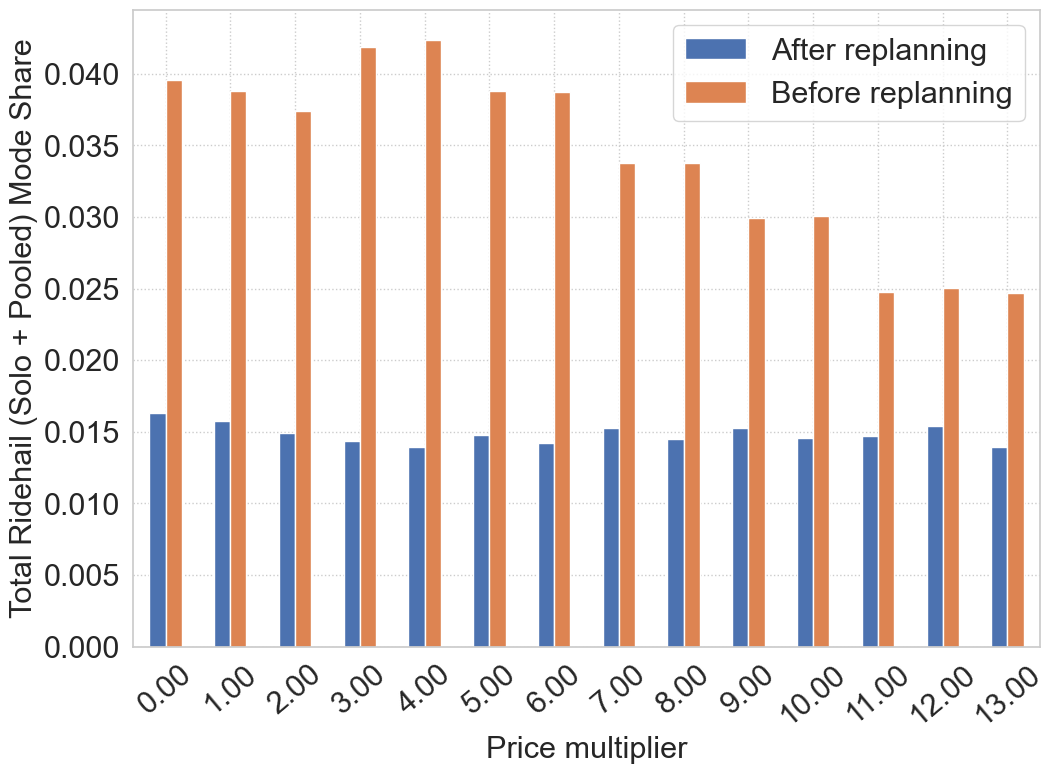

In [38]:
constant_size.plot.bar(x = 'Price Multiplier', y = ['Trip Exec Share Ride Hail Total', 'Trip Mode Share Ride Hail Total'], rot = 40)
sns.set_style("whitegrid",{ "grid.linestyle": ":"})
plt.rc('legend', fontsize= 22)
plt.rc('xtick', labelsize= 22)    # fontsize of the tick labels
plt.rc('ytick', labelsize= 22)    # fontsize of the tick labels
#plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places

plt.ylabel("Total Ridehail (Solo + Pooled) Mode Share", size = s1)
plt.xlabel("Price multiplier", size = s1)
L=plt.legend()
L.get_texts()[0].set_text('After replanning')
L.get_texts()[1].set_text('Before replanning')
plt.savefig('mode_shares/rh_replan_price_barplot.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


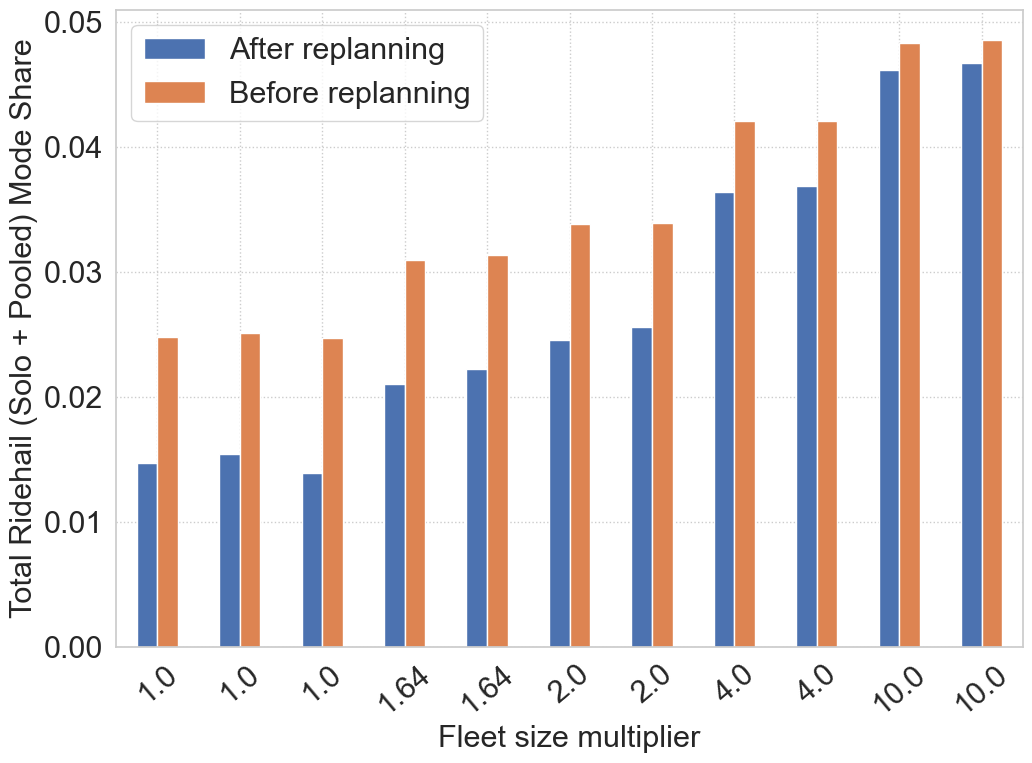

In [39]:
constant_price.plot.bar(x = 'Size Multiplier', y = ['Trip Exec Share Ride Hail Total', 'Trip Mode Share Ride Hail Total'], rot = 40)
#plt.rc('legend', fontsize= s1)
#plt.rc('xtick', labelsize= s1)    # fontsize of the tick labels
#plt.rc('ytick', labelsize= s1)    # fontsize of the tick labels
#plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.3f}')) # 2 decimal places
#plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places
plt.ylabel("Total Ridehail (Solo + Pooled) Mode Share", size = s1)
plt.xlabel("Fleet size multiplier", size = s1)
L=plt.legend()
L.get_texts()[0].set_text('After replanning')
L.get_texts()[1].set_text('Before replanning')
plt.savefig('mode_shares/rh_replan_size_barplot.eps')

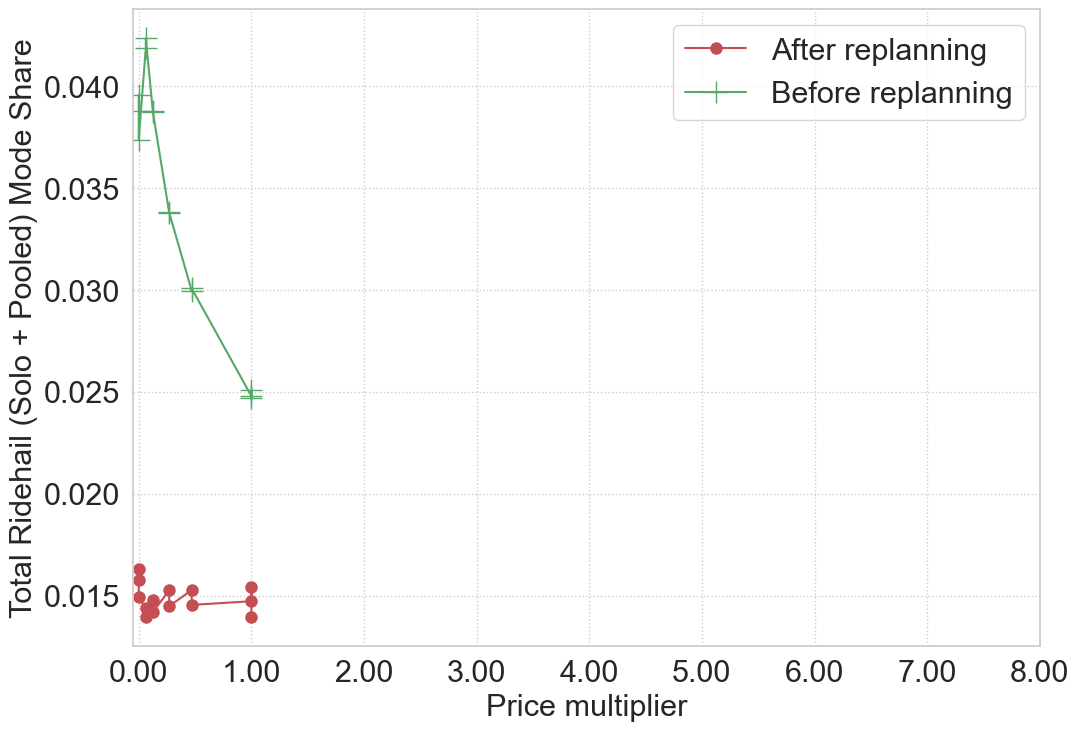

In [40]:
x=constant_size['Price Multiplier']
y=constant_size['Trip Exec Share Ride Hail Total']
z=constant_size['Trip Mode Share Ride Hail Total']

plt.rc('legend', fontsize= s1)
plt.rc('xtick', labelsize= s1)    # fontsize of the tick labels
plt.rc('ytick', labelsize= s1)    # fontsize of the tick labels
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.3f}')) # 2 decimal places
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places


# multiple lines with legend
plt.plot(x,y,marker='.', color='r', markersize = m1, label= 'After replanning')
plt.plot(x,z, marker = '+', color = 'g', markersize = m1, label = 'Before replanning')
plt.ylabel("Total Ridehail (Solo + Pooled) Mode Share", size = s1)
plt.xlabel("Price multiplier", size = s1)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8])
plt.savefig('mode_shares/rh_replan_price.eps')
plt.legend();

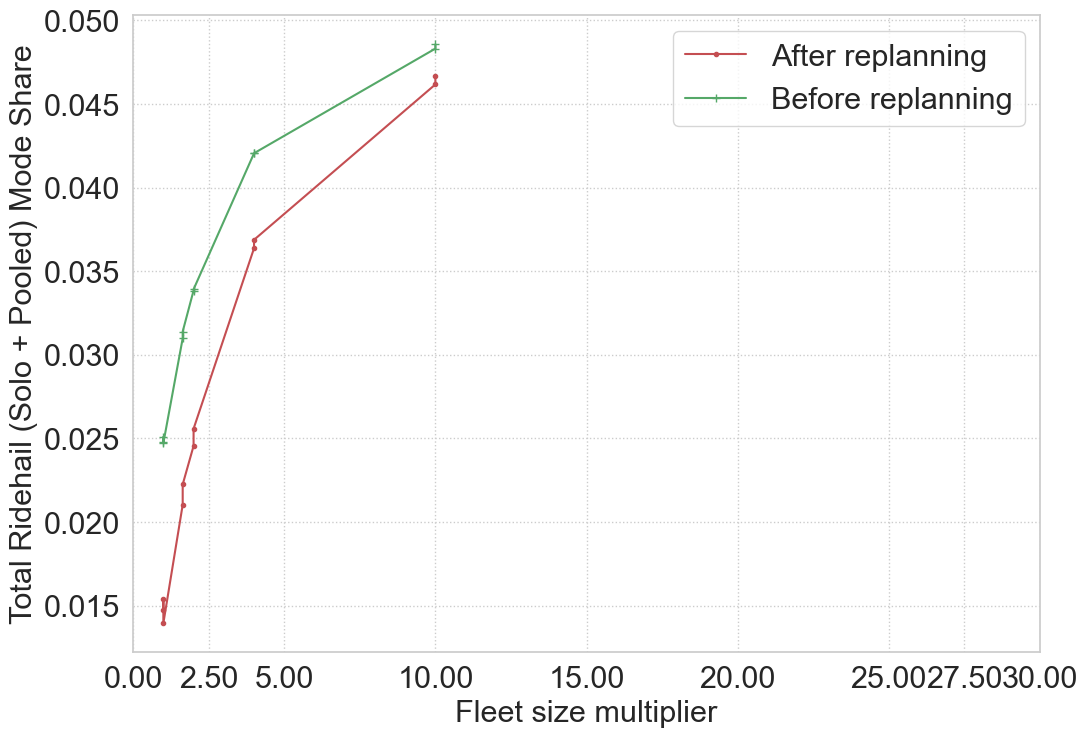

In [41]:
x=constant_price['Size Multiplier']
y=constant_price['Trip Exec Share Ride Hail Total']
z=constant_price['Trip Mode Share Ride Hail Total']

plt.rc('legend', fontsize= s1)
plt.rc('xtick', labelsize= s1)    # fontsize of the tick labels
plt.rc('ytick', labelsize= s1)    # fontsize of the tick labels
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.3f}')) # 2 decimal places
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places

# multiple lines with legend
plt.plot(x,y,marker='.', color='r', label= 'After replanning')
plt.plot(x,z, marker = '+', color = 'g',label = 'Before replanning')
plt.ylabel("Total Ridehail (Solo + Pooled) Mode Share", size = s1)
plt.xlabel("Fleet size multiplier", size = s1)
plt.xticks([0, 2.5, 5, 10, 15, 20, 25, 27.5, 30])
plt.savefig('mode_shares/rh_replan_size.eps')
plt.legend();

In [42]:
df.head()

Variable,Number of fleets,Total fleet size,RH Pooled Price,RH Solo Price,Simulated Agents,Trips per Agent AV,Trip Vehicle Total,Trip Est Total,Trip Mode Total,Trip Replanning Total,...,Transit_Exec_Total,Bike_Diff,Walk_Diff,Walk-Transit_Diff,Ride Hail_Diff,Ride Hail-Transit_Diff,Ride Hail Pooled_Diff,Drive-Transit_Diff,Bike-Transit_Diff,Car Modes_Diff
Baseline,1,1.00,1.0,1.0,1937432,3.837654,17844548,7435193,7604885,169726,...,0.061918,0.000316,0.001298,-0.010508,-0.007469,0,-0.002594,-0.000031,-0.000009,0.018998
1Fl 1Pr 1Flz,2,1.00,1.0,1.0,1937360,3.839641,17848430,7438766,7606010,167283,...,0.061957,0.000311,0.001279,-0.010595,-0.006839,0,-0.002821,-0.000033,-0.000008,0.018705
5Fl 1Pr 1Flz,5,1.00,1.0,1.0,1937424,3.839002,17855388,7437774,7611958,174218,...,0.062102,0.000323,0.001338,-0.010331,-0.008432,0,-0.002340,-0.000037,-0.000011,0.019491
5Fl 1Pr 1.6Flz,5,1.64,1.0,1.0,1937388,3.839239,17846876,7438096,7608110,170051,...,0.061745,0.000314,0.001246,-0.010508,-0.007366,0,-0.002586,-0.000035,-0.000010,0.018946
5Fl 1Pr 2Flz,5,2.00,1.0,1.0,1937426,3.839440,17830954,7438630,7602653,164059,...,0.061575,0.000300,0.001198,-0.010386,-0.006654,0,-0.002641,-0.000034,-0.000010,0.018225


In [43]:
# Plotting where the change in demand goes
X = ['Bike',
'Walk',
'Walk-Transit',
'Ride Hail',
'Ride Hail-Transit',
'Ride Hail Pooled',
'Drive-Transit',
'Bike-Transit',
'Car Modes']

# Manually change location of 
# RH Price 0% : row number 0
differences = constant_size.iloc[0,-len(X):]

In [44]:
differences

Variable
Bike_Diff                 0.000583
Walk_Diff                 0.002606
Walk-Transit_Diff        -0.012701
Ride Hail_Diff           -0.008243
Ride Hail-Transit_Diff    0.000000
Ride Hail Pooled_Diff    -0.015050
Drive-Transit_Diff       -0.000042
Bike-Transit_Diff        -0.000021
Car Modes_Diff            0.032868
Name: 1Fl MixPr 1Flz, dtype: float64

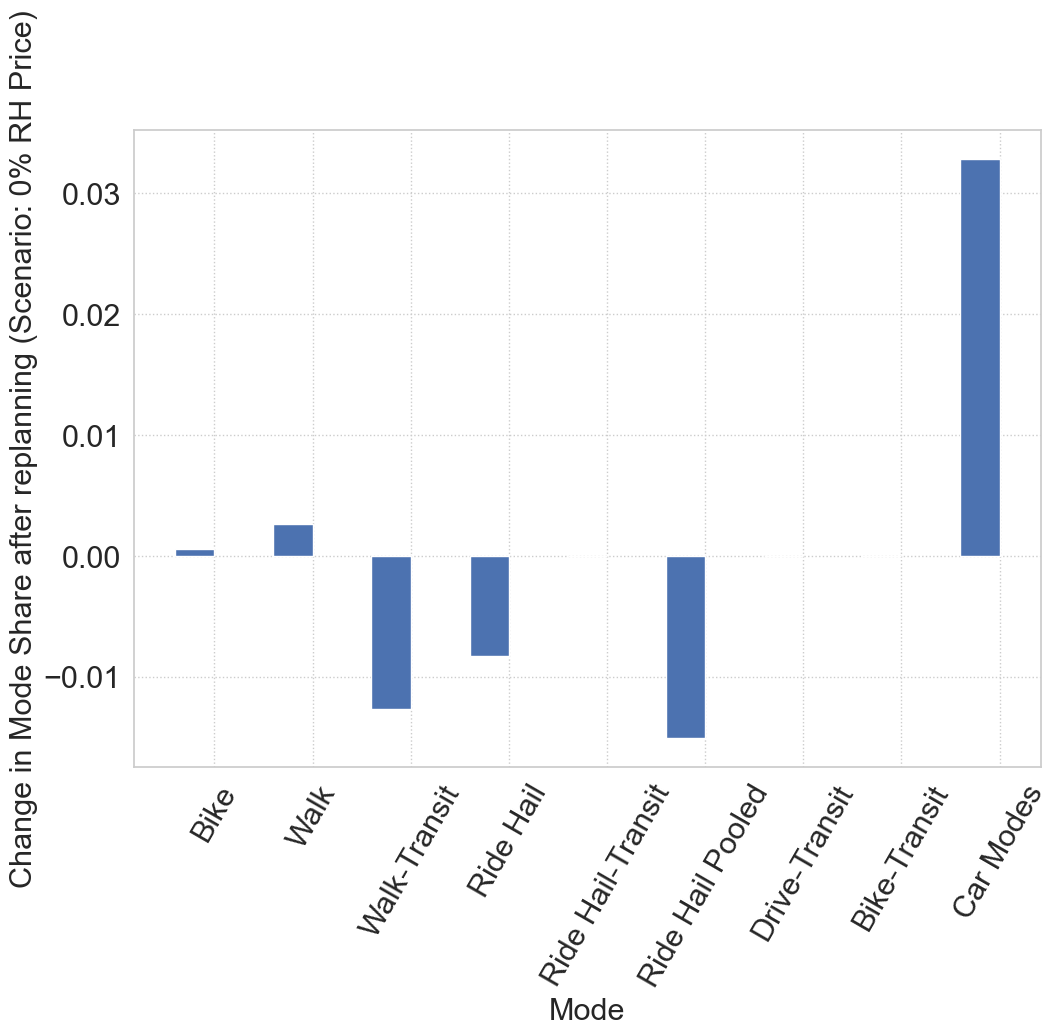

In [45]:
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, differences, 0.4)

plt.rc('legend', fontsize= s1)
plt.rc('xtick', labelsize= s1)    # fontsize of the tick labels
plt.rc('ytick', labelsize= s1)    # fontsize of the tick labels 

plt.xticks(X_axis, X)
plt.xlabel("Mode", size = s1)
plt.xticks(rotation = 60)
plt.ylabel("Change in Mode Share after replanning (Scenario: 0% RH Price)", size = s1)
plt.savefig('mode_shares/replanning_modes_change.eps')

In [46]:
# Scaling VMTs
constant_size['Length Vehicle SUM Empty Ride Hail [km]'] = constant_size['Length Vehicle SUM Empty Ride Hail [km]'] * 10
constant_price['Length Vehicle SUM Empty Ride Hail [km]'] = constant_price['Length Vehicle SUM Empty Ride Hail [km]'] * 10

constant_size['Length VehicleSUM [km]'] = constant_size['Length VehicleSUM [km]'] * 10
constant_price['Length VehicleSUM [km]'] = constant_price['Length VehicleSUM [km]'] * 10

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


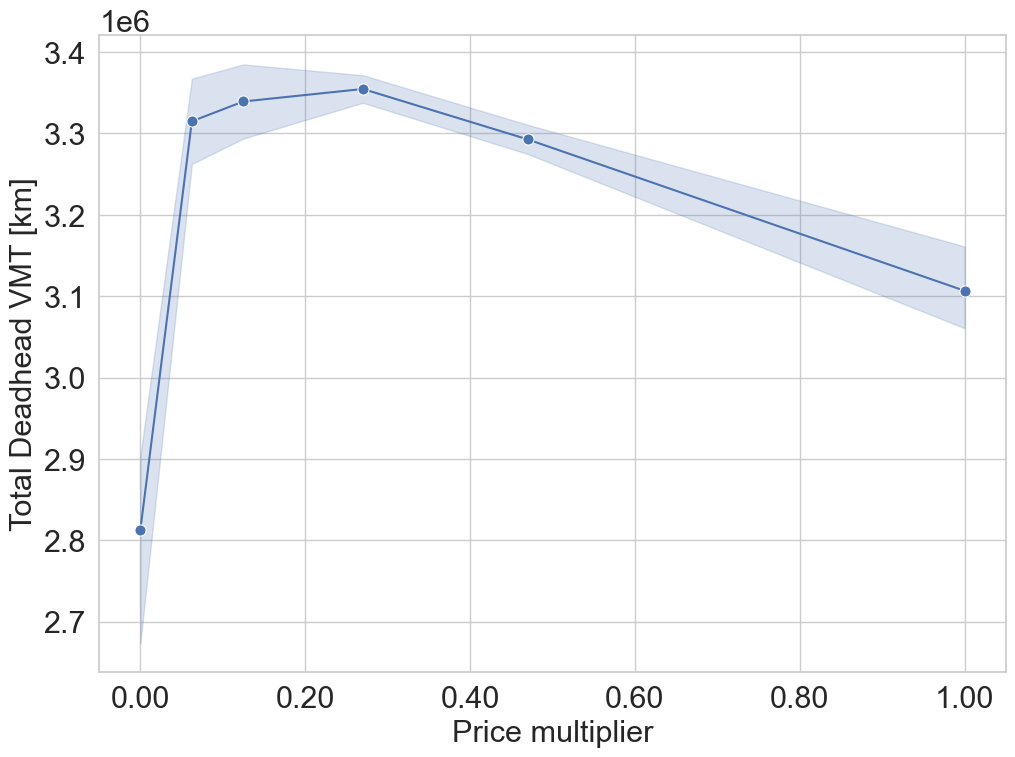

In [47]:
sns.set_style("whitegrid")
plt.rc('legend', fontsize= s1)
plt.rc('xtick', labelsize= s1)    # fontsize of the tick labels
plt.rc('ytick', labelsize= s1)    # fontsize of the tick labels
#plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places

ax =sns.lineplot(
    data=constant_size,
    x="Price Multiplier", 
    y="Length Vehicle SUM Empty Ride Hail [km]",
    marker='.', markersize = m1)
plt.ylabel("Total Deadhead VMT [km]", size = s1)
plt.xlabel("Price multiplier", size =s1)
plt.savefig('vmt/total_dead_vmt_price.eps')
#plt.legend();

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


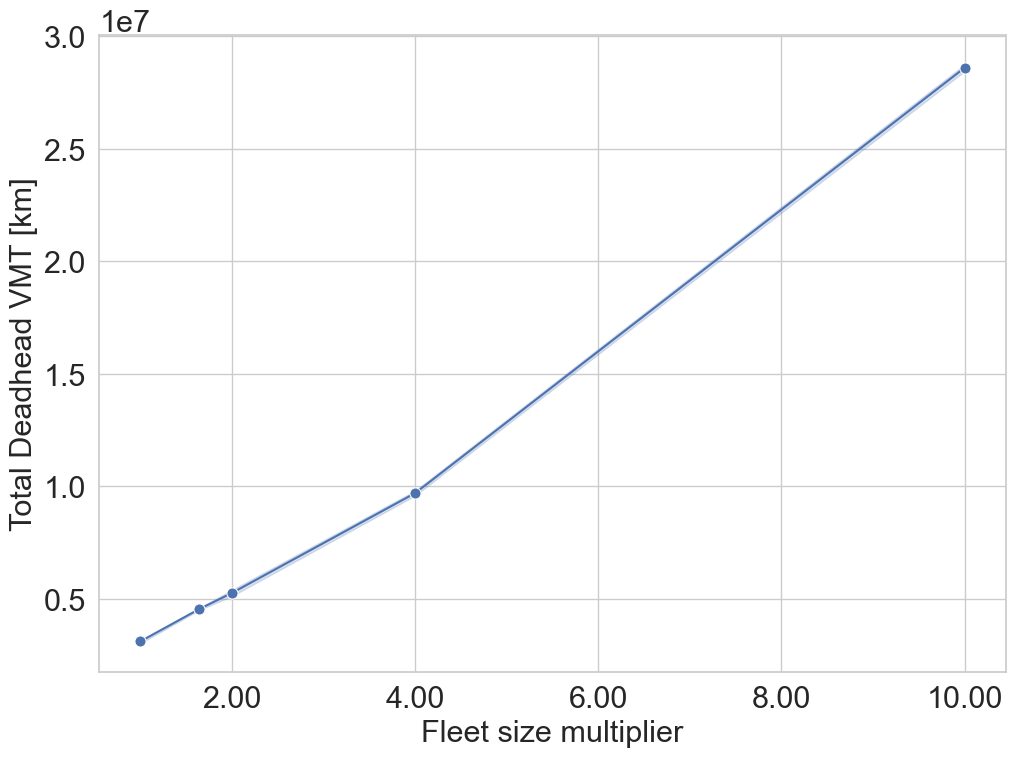

In [48]:
sns.set_style("whitegrid")
plt.rc('legend', fontsize= s1)
plt.rc('xtick', labelsize= s1)    # fontsize of the tick labels
plt.rc('ytick', labelsize= s1)    # fontsize of the tick labels
#plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places

ax =sns.lineplot(
    data=constant_price,
    x="Size Multiplier", 
    y="Length Vehicle SUM Empty Ride Hail [km]",
    marker='.', markersize = m1)
plt.ylabel("Total Deadhead VMT [km]", size = s1)
plt.xlabel("Fleet size multiplier", size = s1)
plt.savefig('vmt/total_dead_vmt_size.eps')
#plt.legend();

In [49]:
constant_size['vmt_pc_diff']=((constant_size['Length VehicleSUM [km]'] - constant_size['Length VehicleSUM [km]'].iloc[4])/constant_size['Length VehicleSUM [km]'].iloc[4]) # minus baseline


In [50]:
constant_size['dead_vmt_pc_diff']=((constant_size['Length Vehicle SUM Empty Ride Hail [km]']-constant_size['Length Vehicle SUM Empty Ride Hail [km]'].iloc[4])/constant_size['Length Vehicle SUM Empty Ride Hail [km]'].iloc[4]) # minus baseline

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


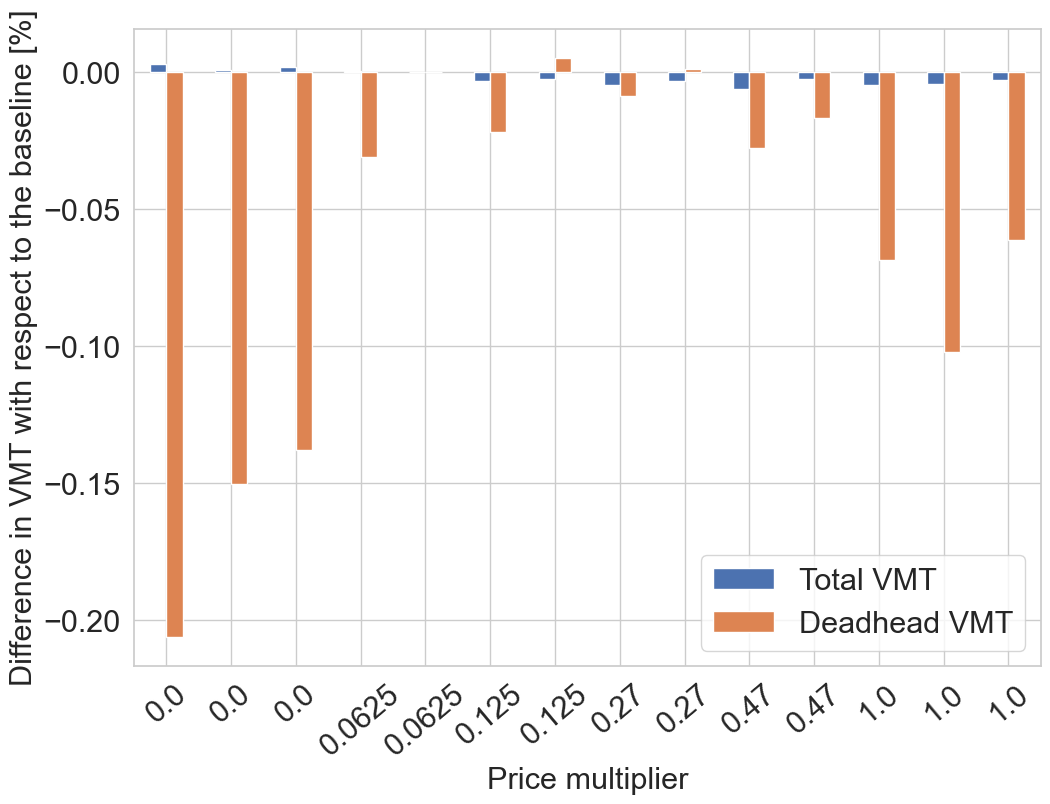

In [51]:
constant_size.plot.bar(x = 'Price Multiplier', y = ['vmt_pc_diff', 'dead_vmt_pc_diff'], rot = 40)
plt.rc('legend', fontsize= s1)
plt.rc('xtick', labelsize= s1)    # fontsize of the tick labels
plt.rc('ytick', labelsize= s1)    # fontsize of the tick labels
#plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.3f}')) # 2 decimal places
#plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places
plt.ylabel("Difference in VMT with respect to the baseline [%]", size = s1)
plt.xlabel("Price multiplier", size = s1)
L=plt.legend()
L.get_texts()[0].set_text('Total VMT')
L.get_texts()[1].set_text('Deadhead VMT')
plt.savefig('vmt/vmt_diff_barplot_price.eps')

In [52]:
constant_price['dead_vmt_pc_diff']=((constant_price['Length Vehicle SUM Empty Ride Hail [km]']-constant_price['Length Vehicle SUM Empty Ride Hail [km]'].iloc[4])/constant_price['Length Vehicle SUM Empty Ride Hail [km]'].iloc[4]) # minus baseline

In [53]:
constant_price['vmt_pc_diff']=((constant_price['Length VehicleSUM [km]'] - constant_price['Length VehicleSUM [km]'].iloc[4])/constant_price['Length VehicleSUM [km]'].iloc[4]) # minus baseline

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


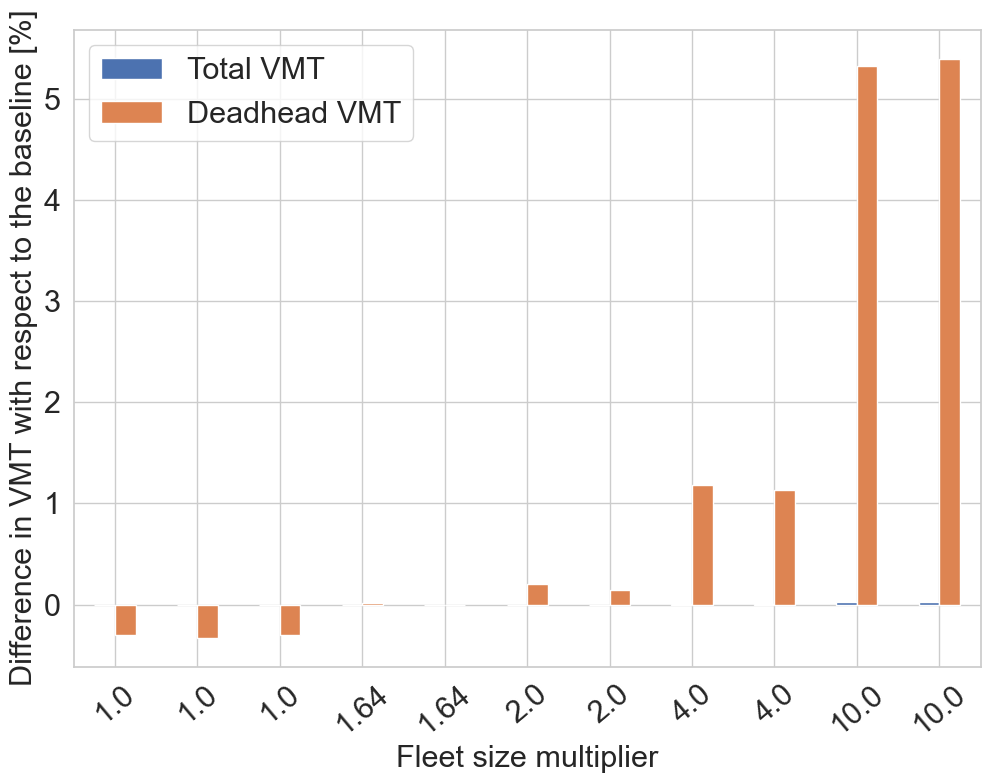

In [54]:
constant_price.plot.bar(x = 'Size Multiplier', y = ['vmt_pc_diff', 'dead_vmt_pc_diff'], rot = 40)
plt.rc('legend', fontsize= s1)
plt.rc('xtick', labelsize= s1)    # fontsize of the tick labels
plt.rc('ytick', labelsize= s1)    # fontsize of the tick labels
#plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.3f}')) # 2 decimal places
#plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places
plt.ylabel("Difference in VMT with respect to the baseline [%]", size = s1)
plt.xlabel("Fleet size multiplier", size = s1)
L=plt.legend()
L.get_texts()[0].set_text('Total VMT')
L.get_texts()[1].set_text('Deadhead VMT')
plt.savefig('vmt/vmit_diff_barplot_size.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


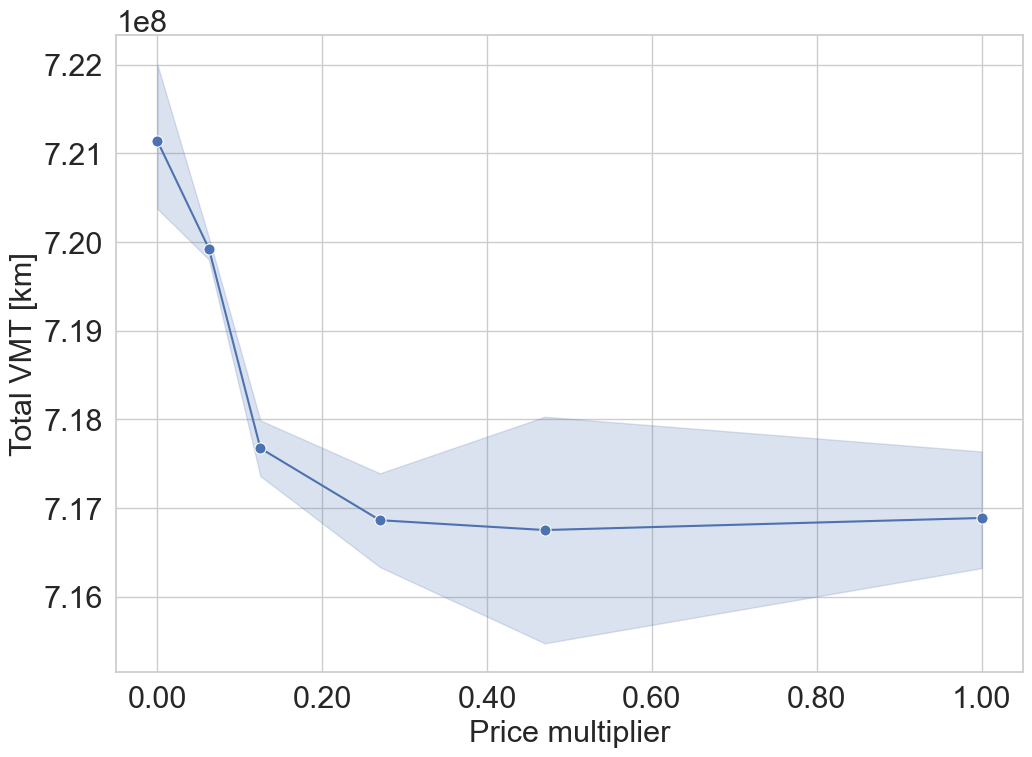

In [55]:
sns.set_style("whitegrid")
plt.rc('legend', fontsize= s1)
plt.rc('xtick', labelsize= s1)    # fontsize of the tick labels
plt.rc('ytick', labelsize= s1)    # fontsize of the tick labels
#plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places

ax =sns.lineplot(
    data=constant_size,
    x="Price Multiplier", 
    y="Length VehicleSUM [km]",
    marker='.', markersize = m1)
plt.ylabel("Total VMT [km]", size = s1)
plt.xlabel("Price multiplier", size = s1)
plt.savefig('vmt/total_vmt_price.eps')
#plt.legend();

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


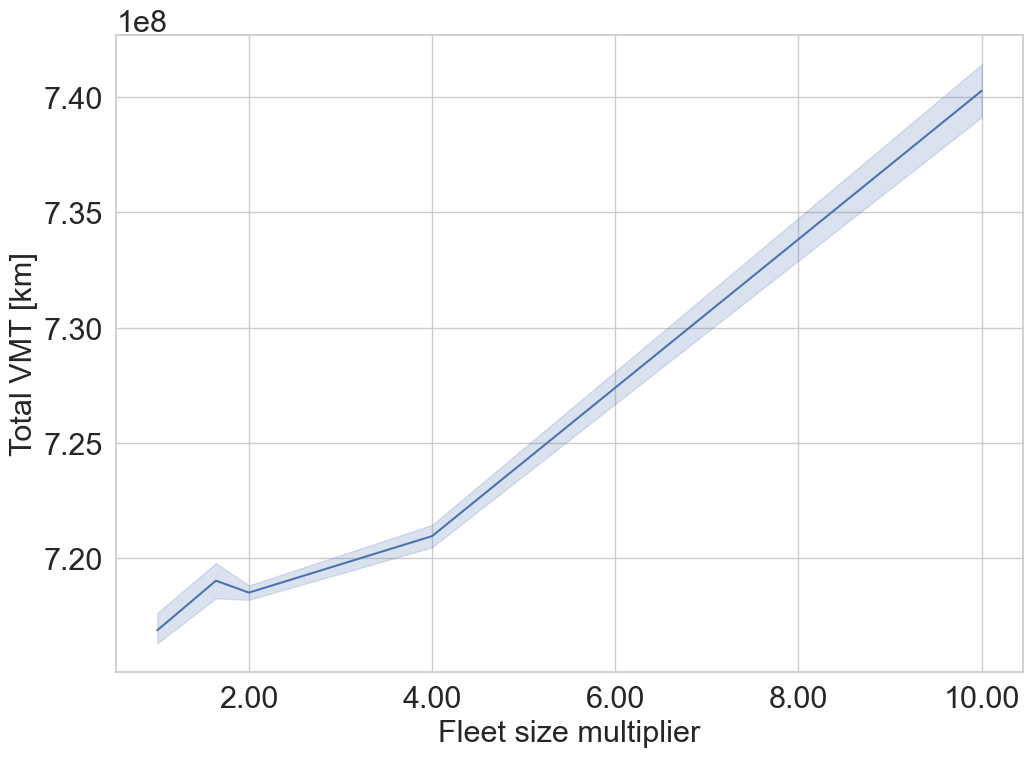

In [56]:
sns.set_style("whitegrid")
plt.rc('legend', fontsize= s1)
plt.rc('xtick', labelsize= s1)    # fontsize of the tick labels
plt.rc('ytick', labelsize= s1)    # fontsize of the tick labels
#plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places


sns.set_theme()
ax =sns.lineplot(
    data=constant_price,
    x="Size Multiplier", 
    y="Length VehicleSUM [km]")
plt.ylabel("Total VMT [km]", size = s1)
plt.xlabel("Fleet size multiplier", size = s1)
plt.savefig('vmt/total_vmt_size.eps')
#plt.legend();

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


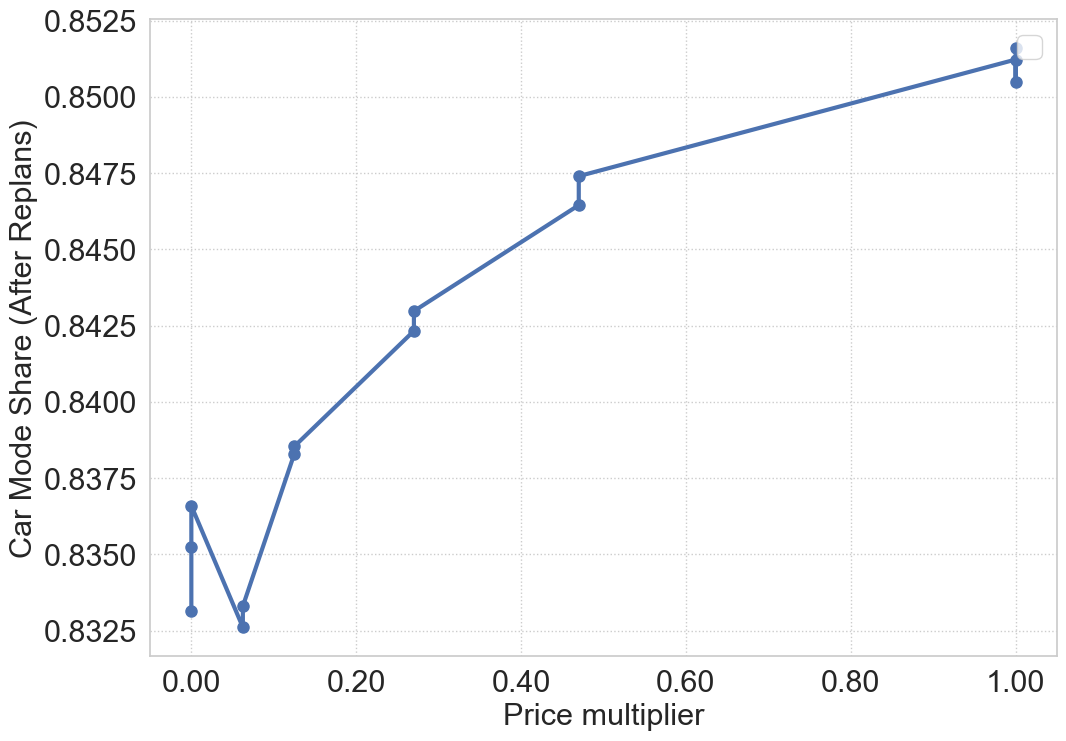

In [57]:
sns.set_style("whitegrid",{ "grid.linestyle": ":"})
plt.rc('legend', fontsize= 22)
plt.rc('xtick', labelsize= 22)    # fontsize of the tick labels
plt.rc('ytick', labelsize= 22)    # fontsize of the tick labels
#plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places

x=constant_size['Price Multiplier']
y=constant_size['Car_Exec_Total']
z=constant_size['Transit_Exec_Total']
# multiple lines with legend
plt.plot(x,y,marker='.', color='b', linewidth = 3.0, markersize = m1)
#plt.plot(x,z, marker = '+', color = 'g',label = 'Transit')
plt.ylabel("Car Mode Share (After Replans)", size = 22)
plt.xlabel("Price multiplier", size = 22)
plt.savefig('mode_shares/rh_car_share_price.eps')
plt.legend();

In [58]:
from scipy.interpolate import make_interp_spline

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


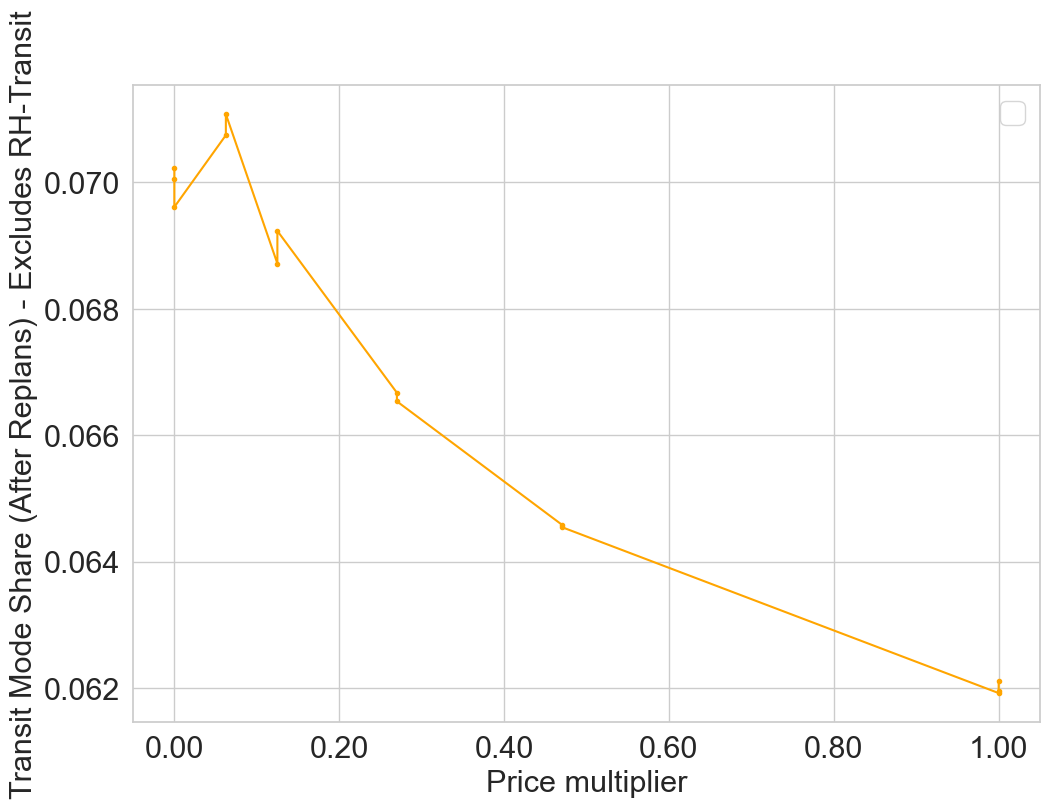

In [59]:
sns.set_style("whitegrid")
plt.rc('legend', fontsize= s1)
plt.rc('xtick', labelsize= s1)    # fontsize of the tick labels
plt.rc('ytick', labelsize= s1)    # fontsize of the tick labels
#plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places


x=constant_size['Price Multiplier']
y=constant_size['Car_Exec_Total']
z=constant_size['Transit_Exec_Total']
# multiple lines with legend
plt.plot(x,z,marker='.', color='orange')
#plt.plot(x,z, marker = '+', color = 'g',label = 'Transit')
plt.ylabel("Transit Mode Share (After Replans) - Excludes RH-Transit", size = s1)
plt.xlabel("Price multiplier", size = s1)
plt.savefig('mode_shares/transit_share_price.eps')
plt.legend();

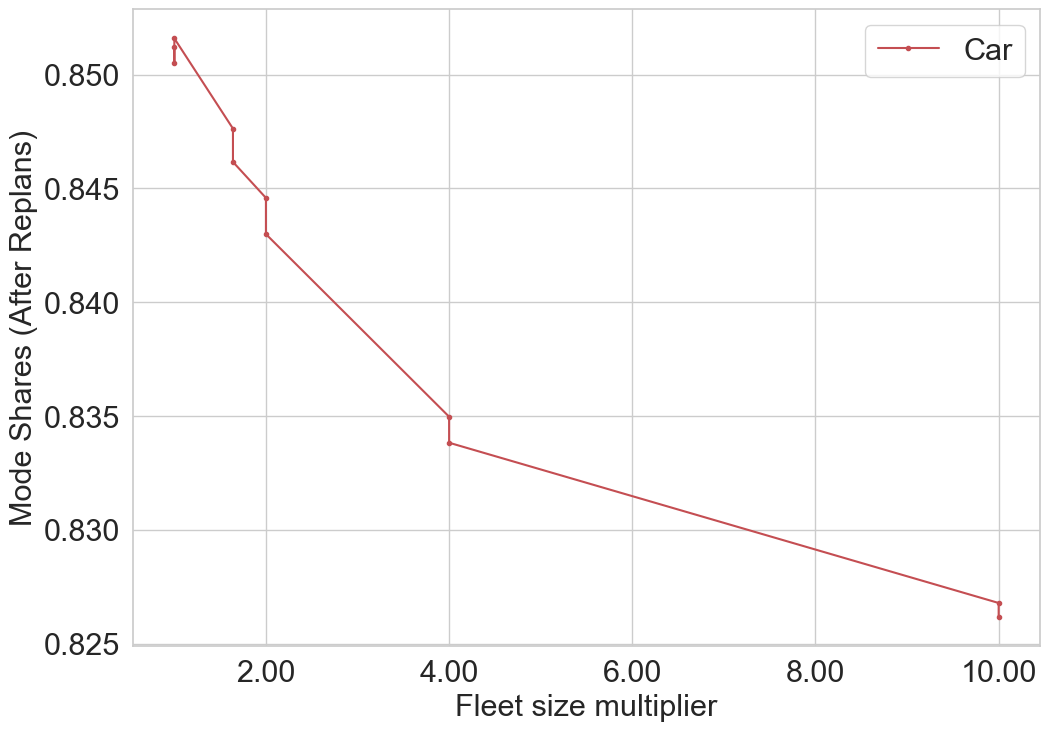

In [60]:
sns.set_style("whitegrid")
plt.rc('legend', fontsize= s1)
plt.rc('xtick', labelsize= s1)    # fontsize of the tick labels
plt.rc('ytick', labelsize= s1)    # fontsize of the tick labels
#plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places


x=constant_price['Size Multiplier']
y=constant_price['Car_Exec_Total']
z=constant_price['Transit_Exec_Total']
# multiple lines with legend
plt.plot(x,y,marker='.', color='r', label= 'Car')
#plt.plot(x,z, marker = '+', color = 'g',label = 'Transit')
plt.ylabel("Mode Shares (After Replans)", size = s1)
plt.xlabel("Fleet size multiplier", size = s1)
plt.savefig('mode_shares/rh_car_share_size.eps')
plt.legend();

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


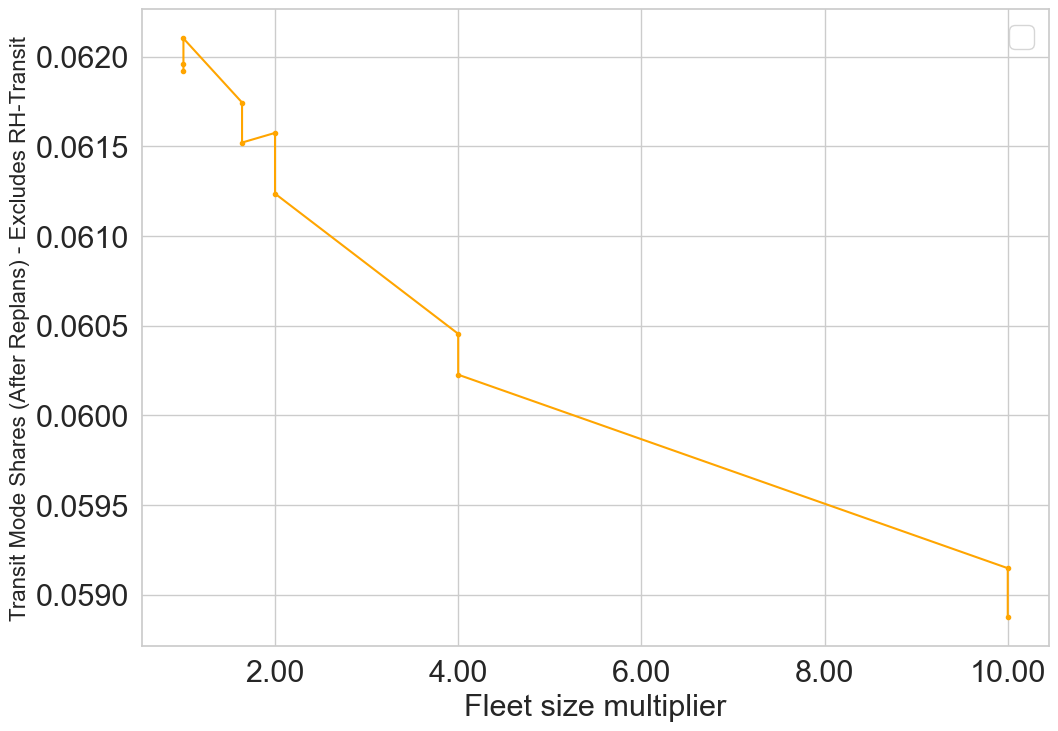

In [61]:
sns.set_style("whitegrid")
plt.rc('legend', fontsize= s1)
plt.rc('xtick', labelsize= s1)    # fontsize of the tick labels
plt.rc('ytick', labelsize= s1)    # fontsize of the tick labels
#plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places


x=constant_price['Size Multiplier']
y=constant_price['Car_Exec_Total']
z=constant_price['Transit_Exec_Total']
# multiple lines with legend
plt.plot(x,z,marker='.', color='orange')
#plt.plot(x,z, marker = '+', color = 'g',label = 'Transit')
plt.ylabel("Transit Mode Shares (After Replans) - Excludes RH-Transit", size =16)
plt.xlabel("Fleet size multiplier", size = s1)
plt.savefig('mode_shares/transit_share_size.eps')
plt.legend();

New plots

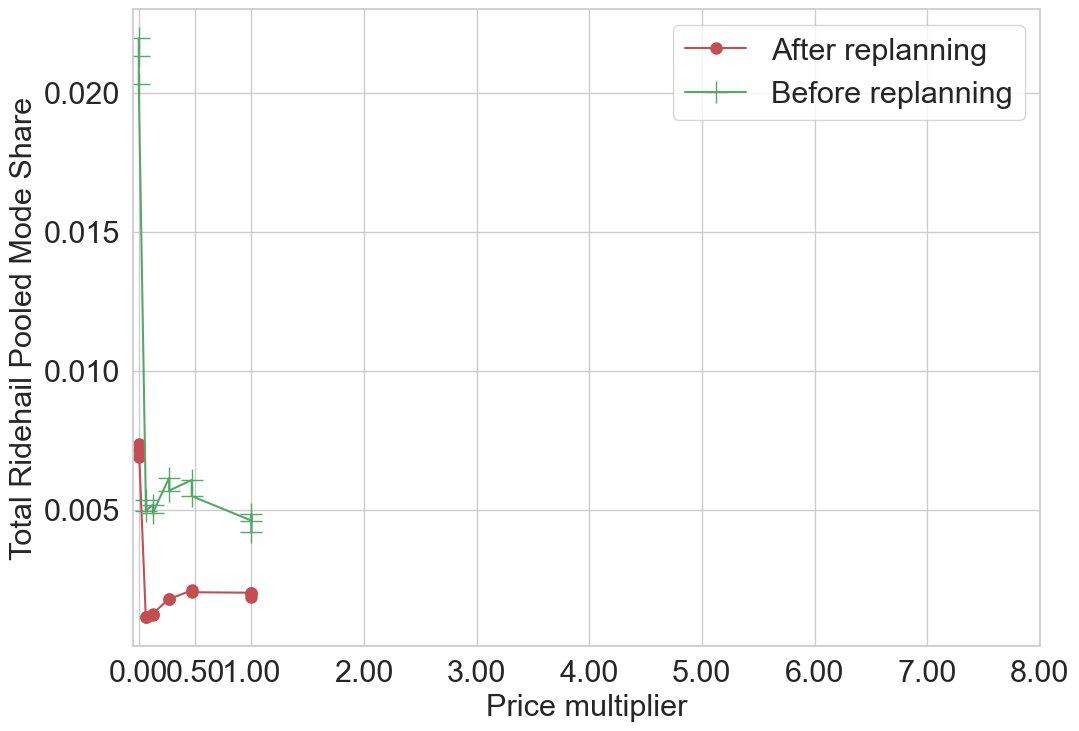

In [62]:
x=constant_size['Price Multiplier']
y=constant_size['Trip Exec Share Ride Hail Pooled']
z=constant_size['Trip Mode Share Ride Hail Pooled']

plt.rc('legend', fontsize= s1)
plt.rc('xtick', labelsize= s1)    # fontsize of the tick labels
plt.rc('ytick', labelsize= s1)    # fontsize of the tick labels
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.3f}')) # 2 decimal places
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places


# multiple lines with legend
plt.plot(x,y,marker='.', color='r', markersize = m1, label= 'After replanning')
plt.plot(x,z, marker = '+', color = 'g', markersize = m1, label = 'Before replanning')
plt.ylabel("Total Ridehail Pooled Mode Share", size = s1)
plt.xlabel("Price multiplier", size = s1)
plt.xticks([0, 0.5, 1, 2, 3, 4, 5, 6, 7, 8])
plt.savefig('mode_shares/rh_replan_price_pooled_line.eps')
plt.legend();

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


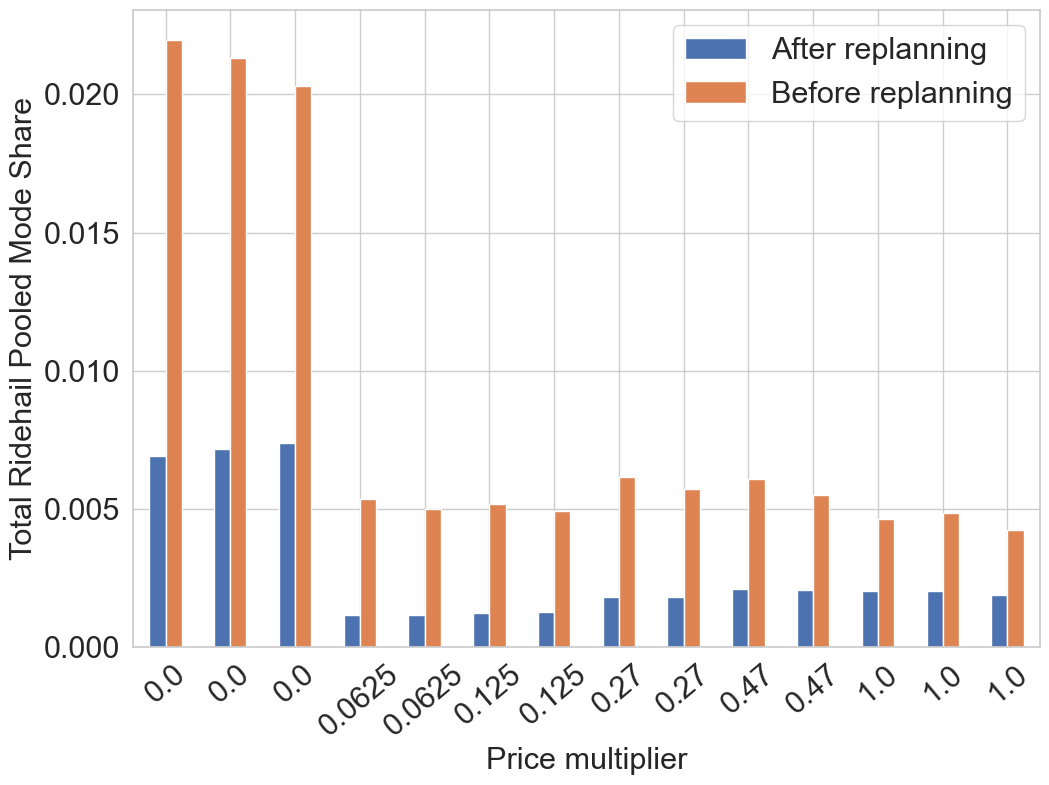

In [63]:
constant_size.plot.bar(x = 'Price Multiplier', y = ['Trip Exec Share Ride Hail Pooled', 'Trip Mode Share Ride Hail Pooled'], rot = 40)
plt.rc('legend', fontsize= s1)
plt.rc('xtick', labelsize= s1)    # fontsize of the tick labels
plt.rc('ytick', labelsize= s1)    # fontsize of the tick labels
#plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.3f}')) # 2 decimal places
#plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places
plt.ylabel("Total Ridehail Pooled Mode Share", size = s1)
plt.xlabel("Price multiplier", size = s1)
L=plt.legend()
L.get_texts()[0].set_text('After replanning')
L.get_texts()[1].set_text('Before replanning')
plt.savefig('mode_shares/rh_replan_price_pooled_barplot.eps')

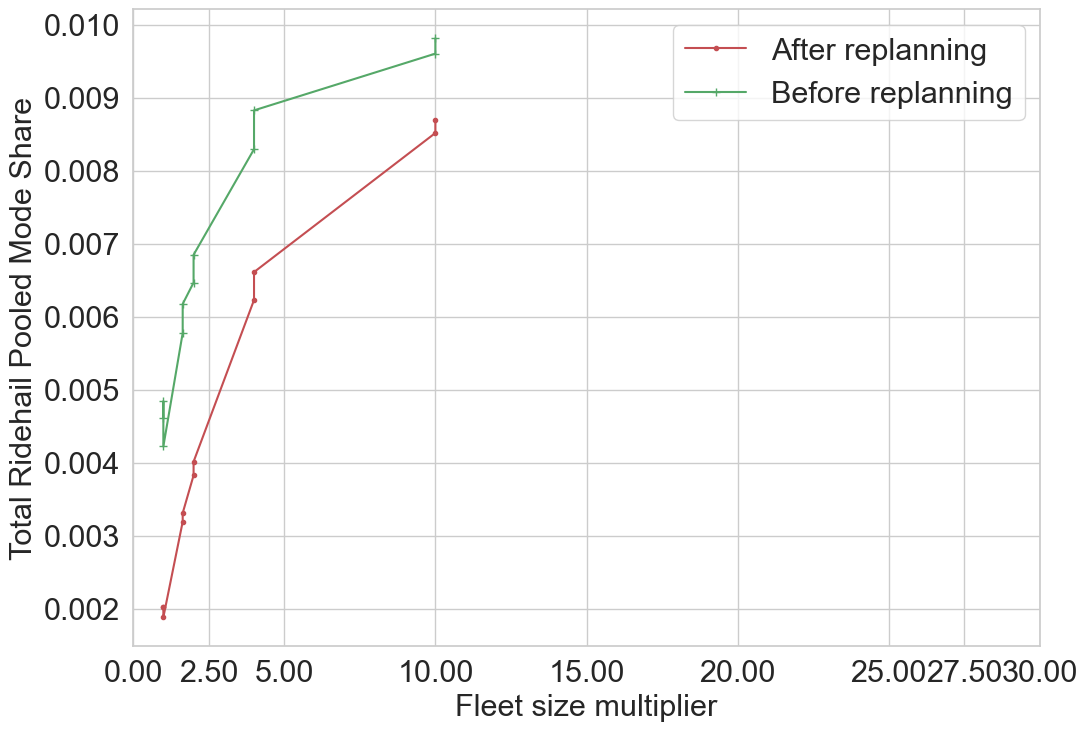

In [64]:
x=constant_price['Size Multiplier']
y=constant_price['Trip Exec Share Ride Hail Pooled']
z=constant_price['Trip Mode Share Ride Hail Pooled']

plt.rc('legend', fontsize= s1)
plt.rc('xtick', labelsize= s1)    # fontsize of the tick labels
plt.rc('ytick', labelsize= s1)    # fontsize of the tick labels
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.3f}')) # 2 decimal places
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places

# multiple lines with legend
plt.plot(x,y,marker='.', color='r', label= 'After replanning')
plt.plot(x,z, marker = '+', color = 'g',label = 'Before replanning')
plt.ylabel("Total Ridehail Pooled Mode Share", size = s1)
plt.xlabel("Fleet size multiplier", size = s1)
plt.xticks([0, 2.5, 5, 10, 15, 20, 25, 27.5, 30])
plt.savefig('mode_shares/rh_replan_size_pooled_line.eps')
plt.legend();

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


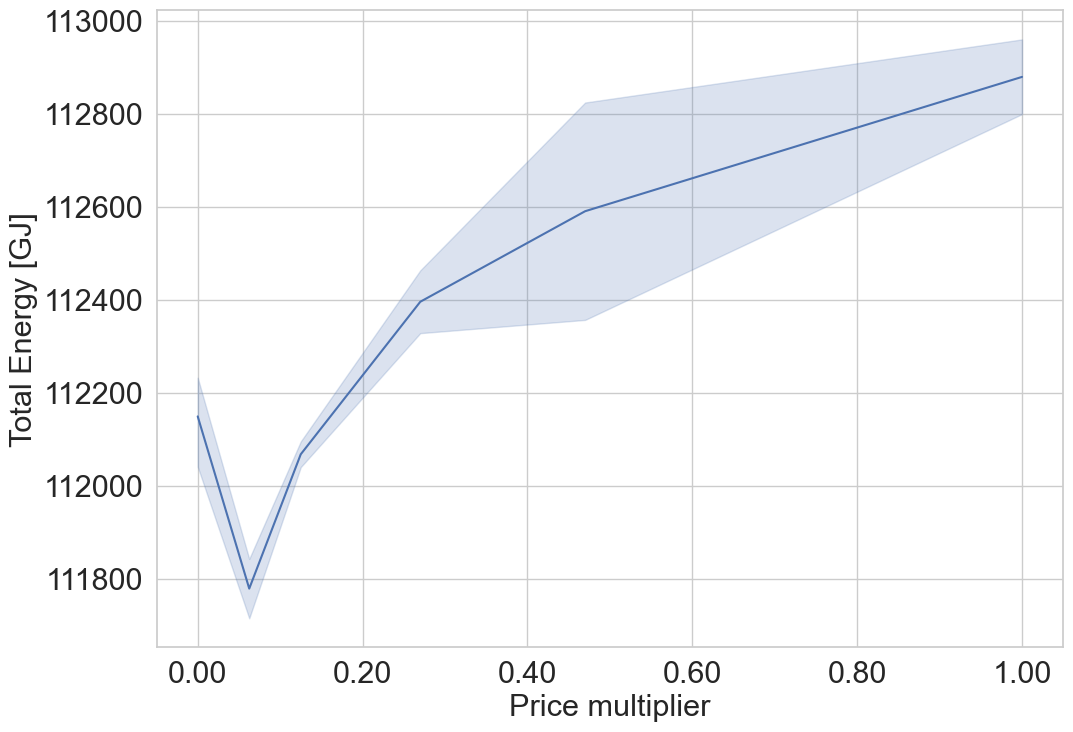

In [65]:
sns.set_style("whitegrid")
plt.rc('legend', fontsize= s1)
plt.rc('xtick', labelsize= s1)    # fontsize of the tick labels
plt.rc('ytick', labelsize= s1)    # fontsize of the tick labels
#plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places

ax =sns.lineplot(
    data=constant_size,
    x="Price Multiplier", 
    y="Energy VehicleSUM [GJ]")
plt.ylabel("Total Energy [GJ]", size = s1)
plt.xlabel("Price multiplier", size = s1)
plt.savefig('other/total_energy_price.eps')
#plt.legend();

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


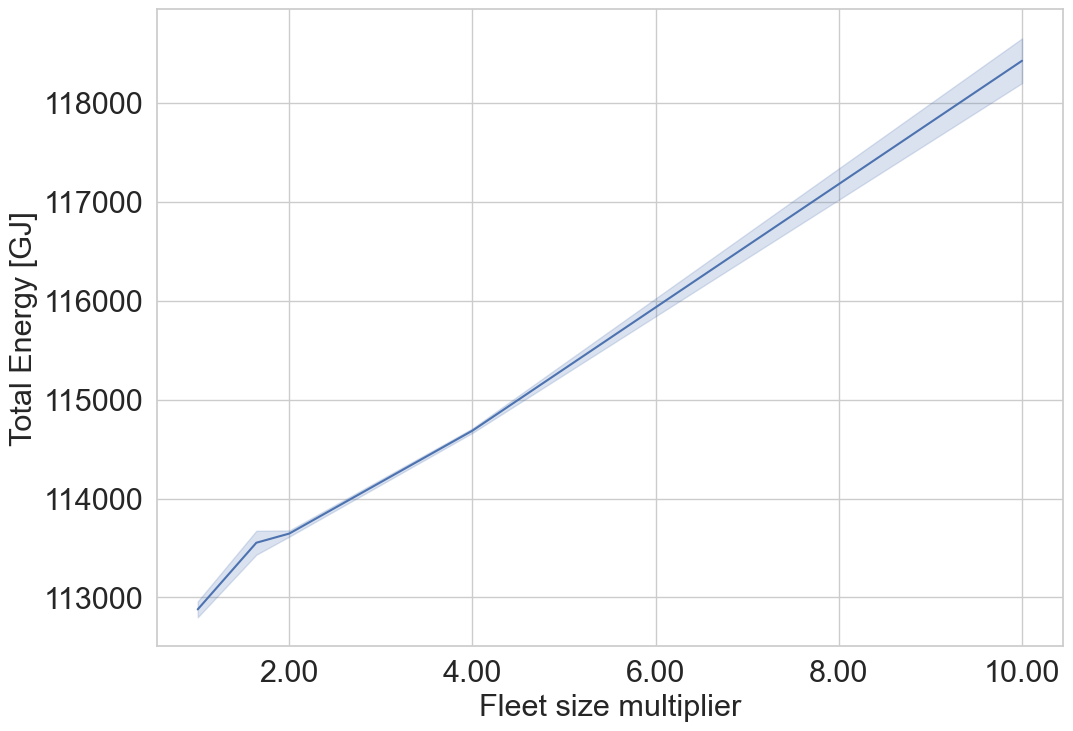

In [66]:
sns.set_style("whitegrid")
plt.rc('legend', fontsize= s1)
plt.rc('xtick', labelsize= s1)    # fontsize of the tick labels
plt.rc('ytick', labelsize= s1)    # fontsize of the tick labels
#plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places


sns.set_theme()
ax =sns.lineplot(
    data=constant_price,
    x="Size Multiplier", 
    y="Energy VehicleSUM [GJ]")
plt.ylabel("Total Energy [GJ]", size = s1)
plt.xlabel("Fleet size multiplier", size = s1)
plt.savefig('other/total_energy_size.eps')
#plt.legend();

In [67]:
constant_price

Variable,Number of fleets,Total fleet size,RH Pooled Price,RH Solo Price,Simulated Agents,Trips per Agent AV,Trip Vehicle Total,Trip Est Total,Trip Mode Total,Trip Replanning Total,...,Walk_Diff,Walk-Transit_Diff,Ride Hail_Diff,Ride Hail-Transit_Diff,Ride Hail Pooled_Diff,Drive-Transit_Diff,Bike-Transit_Diff,Car Modes_Diff,dead_vmt_pc_diff,vmt_pc_diff
Baseline,1,1.00,1.0,1.0,1937432,3.837654,17844548,7435193,7604885,169726,...,0.001298,-0.010508,-0.007469,0,-0.002594,-0.000031,-0.000009,0.018998,-0.302402,-0.004827
1Fl 1Pr 1Flz,2,1.00,1.0,1.0,1937360,3.839641,17848430,7438766,7606010,167283,...,0.001279,-0.010595,-0.006839,0,-0.002821,-0.000033,-0.000008,0.018705,-0.327539,-0.004298
5Fl 1Pr 1Flz,5,1.00,1.0,1.0,1937424,3.839002,17855388,7437774,7611958,174218,...,0.001338,-0.010331,-0.008432,0,-0.002340,-0.000037,-0.000011,0.019491,-0.296805,-0.002999
5Fl 1Pr 1.6Flz,5,1.64,1.0,1.0,1937388,3.839239,17846876,7438096,7608110,170051,...,0.001246,-0.010508,-0.007366,0,-0.002586,-0.000035,-0.000010,0.018946,0.019646,-0.002111
2Fl 1Pr 1.6Flz,2,1.64,1.0,1.0,1937567,3.839957,17832089,7440173,7604317,164177,...,0.001217,-0.010605,-0.006279,0,-0.002865,-0.000029,-0.000007,0.018269,0.000000,0.000000
5Fl 1Pr 2Flz,5,2.00,1.0,1.0,1937426,3.839440,17830954,7438630,7602653,164059,...,0.001198,-0.010386,-0.006654,0,-0.002641,-0.000034,-0.000010,0.018225,0.200174,-0.001342
2Fl 1Pr 2Flz,2,2.00,1.0,1.0,1937443,3.838790,17815656,7437437,7595005,157614,...,0.001173,-0.010568,-0.005504,0,-0.002834,-0.000031,-0.000017,0.017494,0.139467,-0.002207
5Fl 1Pr 4Flz,5,4.00,1.0,1.0,1937273,3.842128,17807999,7443250,7579169,135955,...,0.000981,-0.010490,-0.003615,0,-0.002065,-0.000026,-0.000006,0.014978,1.181559,0.000958
2Fl 1Pr 4Flz,2,4.00,1.0,1.0,1937386,3.842638,17800479,7444674,7575283,130632,...,0.000956,-0.010360,-0.002961,0,-0.002215,-0.000032,-0.000003,0.014379,1.133359,0.002301
5Fl 1Pr 10Flz,5,10.00,1.0,1.0,1937346,3.842776,17819919,7444787,7548422,103680,...,0.000747,-0.010113,-0.001054,0,-0.001087,-0.000033,-0.000002,0.011356,5.330477,0.026856


In [68]:
waits_pool_am = pd.read_csv('pooled_rh_waits_AM.csv')

In [69]:
waits_solo_am = pd.read_csv('solo_rh_waits_AM.csv')

In [70]:
waits_pool_am.head()

,run,25%,50%,75%,count,max,mean,min,std,price,size,test,Type,pc_diff
0,85,2.068747,2.846250,3.792504,1336.0,14.300000,3.065057,0.016667,1.601512,1.000,1.0,baseline,RH pooled,0.000000
1,86,2.516667,3.313967,4.217791,1279.0,14.900000,3.473863,0.050000,1.583521,0.000,1.0,price,RH pooled,16.432740
2,87,2.469061,3.191667,4.039551,1315.0,13.000000,3.364781,0.016667,1.514494,0.125,1.0,price,RH pooled,12.135861
3,88,2.461472,3.177432,3.977335,1306.0,14.833333,3.316544,0.016667,1.516602,0.250,1.0,price,RH pooled,11.635728
4,89,2.258333,2.996029,3.970625,1310.0,13.233334,3.198239,0.016667,1.518424,0.500,1.0,price,RH pooled,5.262339


In [71]:
waits_solo_am = waits_solo_am.rename(columns={'price': 'Price Multiplier', 'size': 'Size Multiplier', '50%': 'median_solo'})
waits_pool_am = waits_pool_am.rename(columns={'price': 'Price Multiplier', 'size': 'Size Multiplier', '50%': 'median_pool'})

In [72]:
waits_pool_am.head()

,run,25%,median_pool,75%,count,max,mean,min,std,Price Multiplier,Size Multiplier,test,Type,pc_diff
0,85,2.068747,2.846250,3.792504,1336.0,14.300000,3.065057,0.016667,1.601512,1.000,1.0,baseline,RH pooled,0.000000
1,86,2.516667,3.313967,4.217791,1279.0,14.900000,3.473863,0.050000,1.583521,0.000,1.0,price,RH pooled,16.432740
2,87,2.469061,3.191667,4.039551,1315.0,13.000000,3.364781,0.016667,1.514494,0.125,1.0,price,RH pooled,12.135861
3,88,2.461472,3.177432,3.977335,1306.0,14.833333,3.316544,0.016667,1.516602,0.250,1.0,price,RH pooled,11.635728
4,89,2.258333,2.996029,3.970625,1310.0,13.233334,3.198239,0.016667,1.518424,0.500,1.0,price,RH pooled,5.262339


In [73]:
constant_price = pd.merge(constant_price, waits_solo_am, on=['Price Multiplier', 'Size Multiplier'], how='inner')
constant_price = pd.merge(constant_price, waits_pool_am, on=['Price Multiplier', 'Size Multiplier'], how='inner')

In [74]:
constant_size = pd.merge(constant_size, waits_solo_am, on=['Price Multiplier', 'Size Multiplier'], how='inner')
constant_size = pd.merge(constant_size, waits_pool_am, on=['Price Multiplier', 'Size Multiplier'], how='inner')

In [75]:
constant_price

,Number of fleets,Total fleet size,RH Pooled Price,RH Solo Price,Simulated Agents,Trips per Agent AV,Trip Vehicle Total,Trip Est Total,Trip Mode Total,Trip Replanning Total,...,median_pool,75%_y,count_y,max_y,mean_y,min_y,std_y,test_y,Type_y,pc_diff_y
0,1,1.0,1.0,1.0,1937432,3.837654,17844548,7435193,7604885,169726,...,2.846250,3.792504,1336.0,14.300000,3.065057,0.016667,1.601512,baseline,RH pooled,0.000000
1,2,1.0,1.0,1.0,1937360,3.839641,17848430,7438766,7606010,167283,...,2.846250,3.792504,1336.0,14.300000,3.065057,0.016667,1.601512,baseline,RH pooled,0.000000
2,5,1.0,1.0,1.0,1937424,3.839002,17855388,7437774,7611958,174218,...,2.846250,3.792504,1336.0,14.300000,3.065057,0.016667,1.601512,baseline,RH pooled,0.000000
3,5,2.0,1.0,1.0,1937426,3.839440,17830954,7438630,7602653,164059,...,2.289583,3.206113,1383.0,11.950000,2.563570,0.016667,1.532683,size,RH pooled,-19.557885
4,2,2.0,1.0,1.0,1937443,3.838790,17815656,7437437,7595005,157614,...,2.289583,3.206113,1383.0,11.950000,2.563570,0.016667,1.532683,size,RH pooled,-19.557885
5,5,4.0,1.0,1.0,1937273,3.842128,17807999,7443250,7579169,135955,...,1.427778,2.360556,1403.0,12.416667,1.873091,0.000000,1.436991,size,RH pooled,-49.836525
6,2,4.0,1.0,1.0,1937386,3.842638,17800479,7444674,7575283,130632,...,1.427778,2.360556,1403.0,12.416667,1.873091,0.000000,1.436991,size,RH pooled,-49.836525
7,5,10.0,1.0,1.0,1937346,3.842776,17819919,7444787,7548422,103680,...,0.804045,1.398090,1406.0,13.083333,1.240086,0.016667,1.306510,size,RH pooled,-71.750723
8,2,10.0,1.0,1.0,1937321,3.843041,17806091,7445205,7545134,99971,...,0.804045,1.398090,1406.0,13.083333,1.240086,0.016667,1.306510,size,RH pooled,-71.750723


In [76]:
for col in constant_price.columns:
    print(col)

Number of fleets
Total fleet size
RH Pooled Price
RH Solo Price
Simulated Agents 
Trips per Agent AV 
Trip Vehicle Total 
Trip Est Total 
Trip Mode Total 
Trip Replanning Total 
Trip Exectuted Total 
Trip Vehicle Walk
Trip Vehicle Bike
Trip Vehicle Car
Trip Vehicle Car Emergency
Trip Vehicle Car HOV2 Emergency
Trip Vehicle Car HOV3 Emergency
Trip Vehicle Ride Hail
Trip Vehicle Empty Ride Hail
Trip Vehicle Ride Hail WC
Trip Vehicle Empty Ride Hail WC
Trip Vehicle CAV
Trip Vehicle Car HOV2
Trip Vehicle Car HOV3
Trip Vehicle Bus
Trip Vehicle Tram
Trip Vehicle Rail
Trip Vehicle Subway
Trip Vehicle Cable Car
Trip Vehicle Ferry
Trip Vehicle Empty Bus
Trip Vehicle Empty Tram
Trip Vehicle Empty Rail
Trip Vehicle Empty Subway
Trip Vehicle Empty Cable Car
Trip Vehicle Empty Ferry
Trip Est Bus
Trip Est Subway
Trip Est Tram
Trip Est Rail
Trip Est Car
Trip Est HOV3 Passenger
Trip Est Bike
Trip Est HOV2 Passenger
Trip Est Walk
Trip Est HOV2 Driver
Trip Est HOV3 Driver
Trip Est Walk-Transit
Trip Est 

Demand and wait time

In [77]:
concat_data = pd.concat([constant_price, constant_size])

In [78]:
concat_data.describe()

,Number of fleets,Total fleet size,RH Pooled Price,RH Solo Price,Simulated Agents,Trips per Agent AV,Trip Vehicle Total,Trip Est Total,Trip Mode Total,Trip Replanning Total,...,run_y,25%_y,median_pool,75%_y,count_y,max_y,mean_y,min_y,std_y,pc_diff_y
count,17.000000,17.000000,17.000000,17.000000,1.700000e+01,17.000000,1.700000e+01,1.700000e+01,1.700000e+01,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,3.058824,2.529412,0.720588,0.897059,1.937638e+06,3.839389,1.784240e+07,7.439347e+06,7.635451e+06,196159.058824,...,90.000000,1.820310,2.496797,3.377472,1345.117647,13.611765,2.758529,0.020588,1.525941,-12.277666
std,1.712841,2.981561,0.447496,0.290592,4.167390e+02,0.002090,2.463161e+04,3.342809e+03,7.378866e+04,75231.331328,...,6.144103,0.696451,0.858923,0.935130,45.008169,1.046037,0.753712,0.015057,0.098960,30.177369
min,1.000000,1.000000,0.000000,0.125000,1.937273e+06,3.836122,1.780048e+07,7.435193e+06,7.545134e+06,99971.000000,...,85.000000,0.525001,0.804045,1.398090,1279.000000,11.950000,1.240086,0.000000,1.306510,-71.750723
25%,2.000000,1.000000,0.125000,1.000000,1.937360e+06,3.837848,1.781992e+07,7.437437e+06,7.595005e+06,157614.000000,...,85.000000,1.576970,2.289583,3.206113,1315.000000,13.000000,2.563570,0.016667,1.514494,-19.557885
50%,2.000000,1.000000,1.000000,1.000000,1.937426e+06,3.839002,1.784843e+07,7.438766e+06,7.606010e+06,169726.000000,...,86.000000,2.068747,2.846250,3.792504,1336.000000,14.300000,3.065057,0.016667,1.583521,0.000000
75%,5.000000,2.000000,1.000000,1.000000,1.938015e+06,3.839641,1.785993e+07,7.441049e+06,7.733604e+06,297979.000000,...,97.000000,2.469061,3.191667,4.039551,1383.000000,14.300000,3.364781,0.016667,1.601512,12.135861
max,5.000000,10.000000,1.000000,1.000000,1.938424e+06,3.843041,1.787965e+07,7.445205e+06,7.748732e+06,309281.000000,...,99.000000,2.516667,3.313967,4.217791,1406.000000,14.900000,3.473863,0.050000,1.601512,16.432740


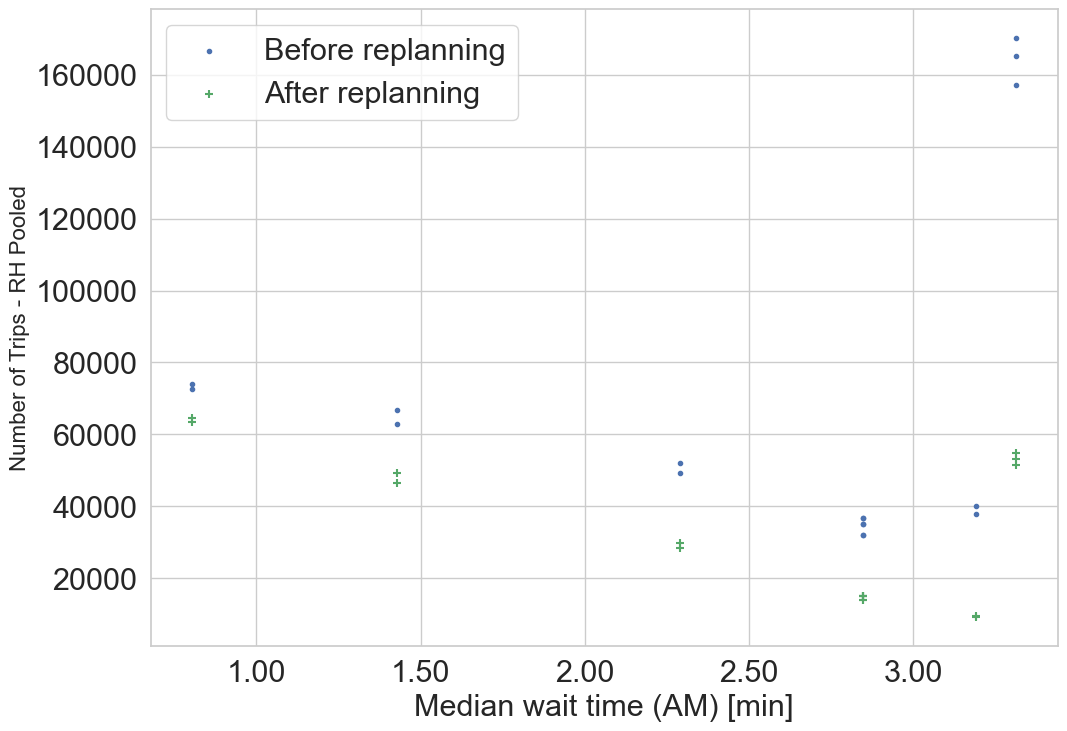

In [79]:
sns.set_style("whitegrid")
plt.rc('legend', fontsize= s1)
plt.rc('xtick', labelsize= s1)    # fontsize of the tick labels
plt.rc('ytick', labelsize= s1)    # fontsize of the tick labels
#plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places


x=concat_data['median_pool']
y=concat_data['Trip Mode Ride Hail Pooled']
z=concat_data['Trip Exec Ride Hail Pooled']
# multiple lines with legend
plt.scatter(x,y,marker='.', color='b', label= 'Before replanning')
plt.scatter(x,z, marker = '+', color = 'g',label = 'After replanning')
plt.ylabel("Number of Trips - RH Pooled", size =16)
plt.xlabel("Median wait time (AM) [min]", size = s1)
plt.savefig('waits/rh_pool_wait_demand.eps')
plt.legend();

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


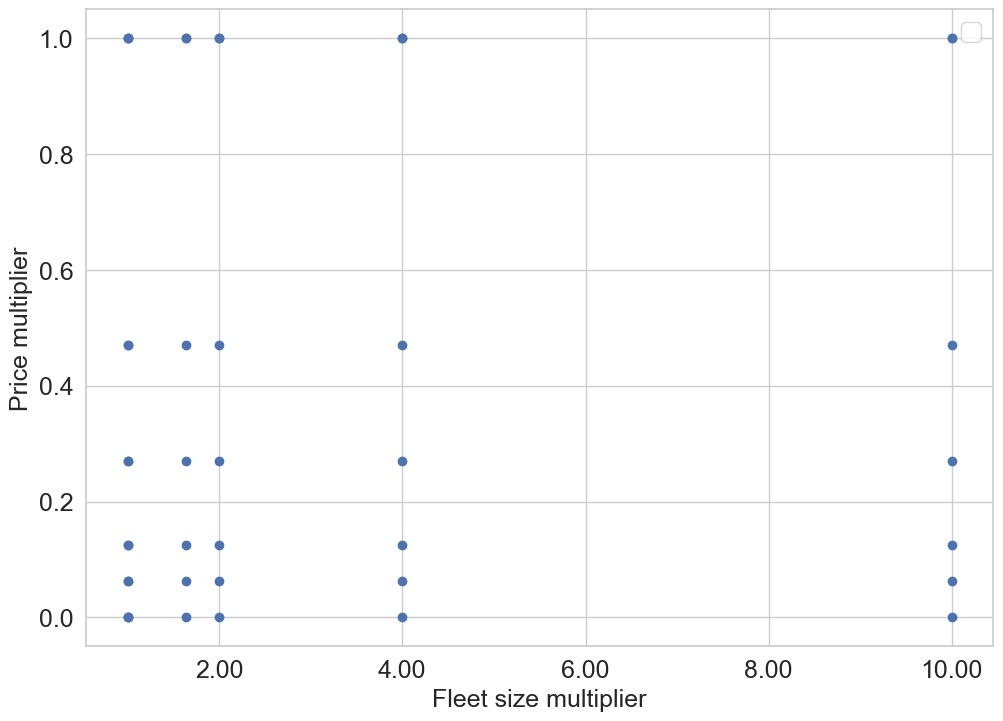

In [80]:
sns.set_style("whitegrid")
plt.rc('legend', fontsize= 18)
plt.rc('xtick', labelsize= 18)    # fontsize of the tick labels
plt.rc('ytick', labelsize= 18)    # fontsize of the tick labels
#plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places

plt.scatter(df['Size Multiplier'],df['Price Multiplier'])
plt.ylabel("Price multiplier", size =18)
plt.xlabel("Fleet size multiplier", size = 18)
plt.savefig('other/rh_tests.eps')
plt.legend();

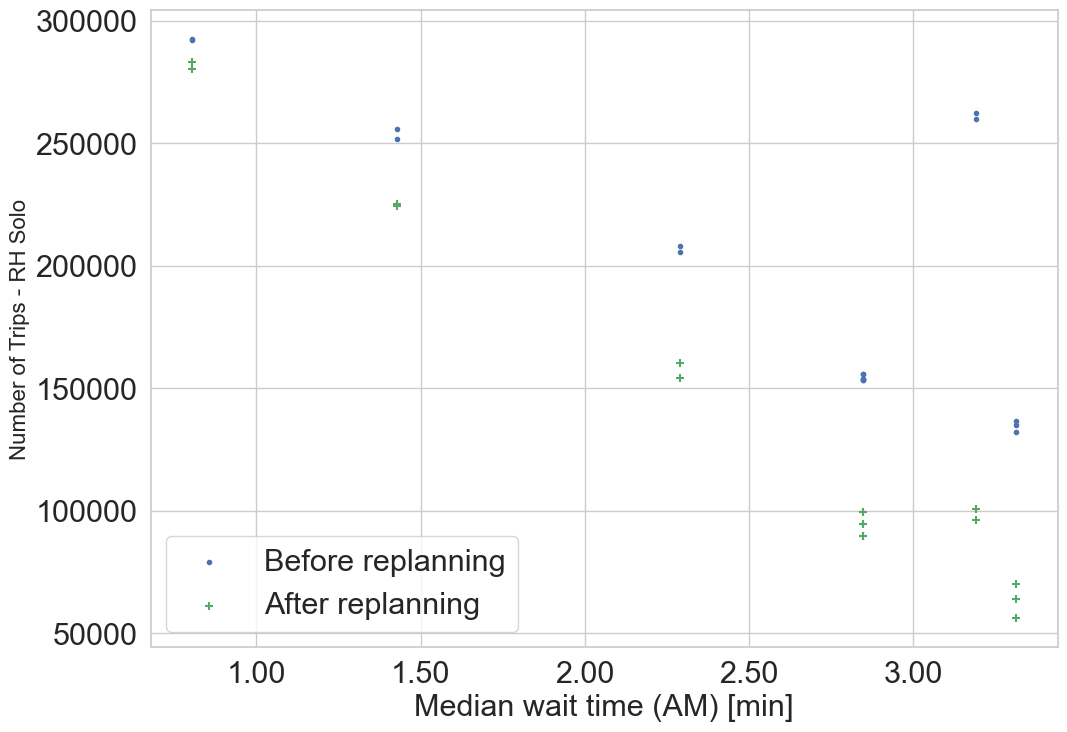

In [81]:
sns.set_style("whitegrid")
plt.rc('legend', fontsize= s1)
plt.rc('xtick', labelsize= s1)    # fontsize of the tick labels
plt.rc('ytick', labelsize= s1)    # fontsize of the tick labels
#plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places


x=concat_data['median_pool']
y=concat_data['Trip Mode Ride Hail']
z=concat_data['Trip Exec Ride Hail']
# multiple lines with legend
plt.scatter(x,y,marker='.', color='b', label= 'Before replanning')
plt.scatter(x,z, marker = '+', color = 'g',label = 'After replanning')
plt.ylabel("Number of Trips - RH Solo", size =16)
plt.xlabel("Median wait time (AM) [min]", size = s1)
plt.savefig('waits/rh_solo_wait_demand.eps')
plt.legend();

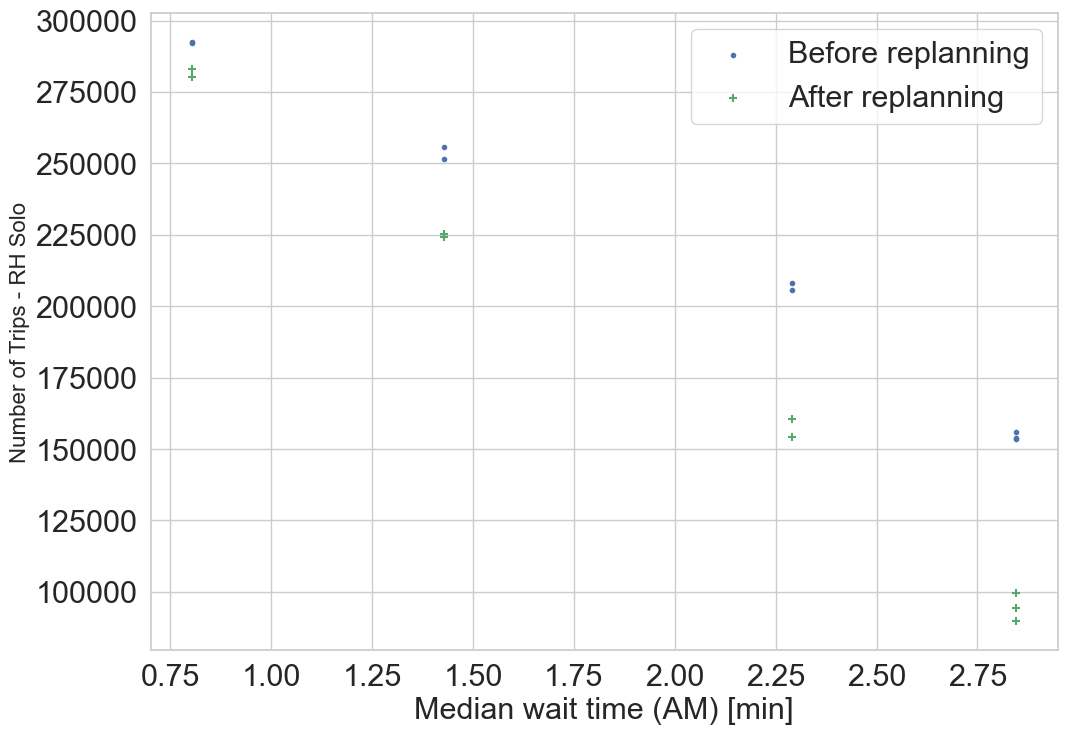

In [82]:
sns.set_style("whitegrid")
plt.rc('legend', fontsize= s1)
plt.rc('xtick', labelsize= s1)    # fontsize of the tick labels
plt.rc('ytick', labelsize= s1)    # fontsize of the tick labels
#plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places


x=constant_price['median_pool']
y=constant_price['Trip Mode Ride Hail']
z=constant_price['Trip Exec Ride Hail']
# multiple lines with legend
plt.scatter(x,y,marker='.', color='b', label= 'Before replanning')
plt.scatter(x,z, marker = '+', color = 'g',label = 'After replanning')
plt.ylabel("Number of Trips - RH Solo", size =16)
plt.xlabel("Median wait time (AM) [min]", size = s1)
plt.savefig('rh_solo_wait_demand.eps')
plt.legend();

In [83]:
constant_size

,Number of fleets,Total fleet size,RH Pooled Price,RH Solo Price,Simulated Agents,Trips per Agent AV,Trip Vehicle Total,Trip Est Total,Trip Mode Total,Trip Replanning Total,...,median_pool,75%_y,count_y,max_y,mean_y,min_y,std_y,test_y,Type_y,pc_diff_y
0,1,1.0,0.000,1.000,1938424,3.838711,17864700,7441049,7746524,305605,...,3.313967,4.217791,1279.0,14.9,3.473863,0.050000,1.583521,price,RH pooled,16.432740
1,2,1.0,0.000,1.000,1938357,3.837848,17873488,7439119,7742081,303077,...,3.313967,4.217791,1279.0,14.9,3.473863,0.050000,1.583521,price,RH pooled,16.432740
2,5,1.0,0.000,1.000,1938354,3.836122,17859926,7435762,7733604,297979,...,3.313967,4.217791,1279.0,14.9,3.473863,0.050000,1.583521,price,RH pooled,16.432740
3,2,1.0,0.125,0.125,1938015,3.836920,17865177,7436009,7740360,304397,...,3.191667,4.039551,1315.0,13.0,3.364781,0.016667,1.514494,price,RH pooled,12.135861
4,5,1.0,0.125,0.125,1938077,3.838608,17879651,7439518,7748732,309281,...,3.191667,4.039551,1315.0,13.0,3.364781,0.016667,1.514494,price,RH pooled,12.135861
5,1,1.0,1.000,1.000,1937432,3.837654,17844548,7435193,7604885,169726,...,2.846250,3.792504,1336.0,14.3,3.065057,0.016667,1.601512,baseline,RH pooled,0.000000
6,2,1.0,1.000,1.000,1937360,3.839641,17848430,7438766,7606010,167283,...,2.846250,3.792504,1336.0,14.3,3.065057,0.016667,1.601512,baseline,RH pooled,0.000000
7,5,1.0,1.000,1.000,1937424,3.839002,17855388,7437774,7611958,174218,...,2.846250,3.792504,1336.0,14.3,3.065057,0.016667,1.601512,baseline,RH pooled,0.000000


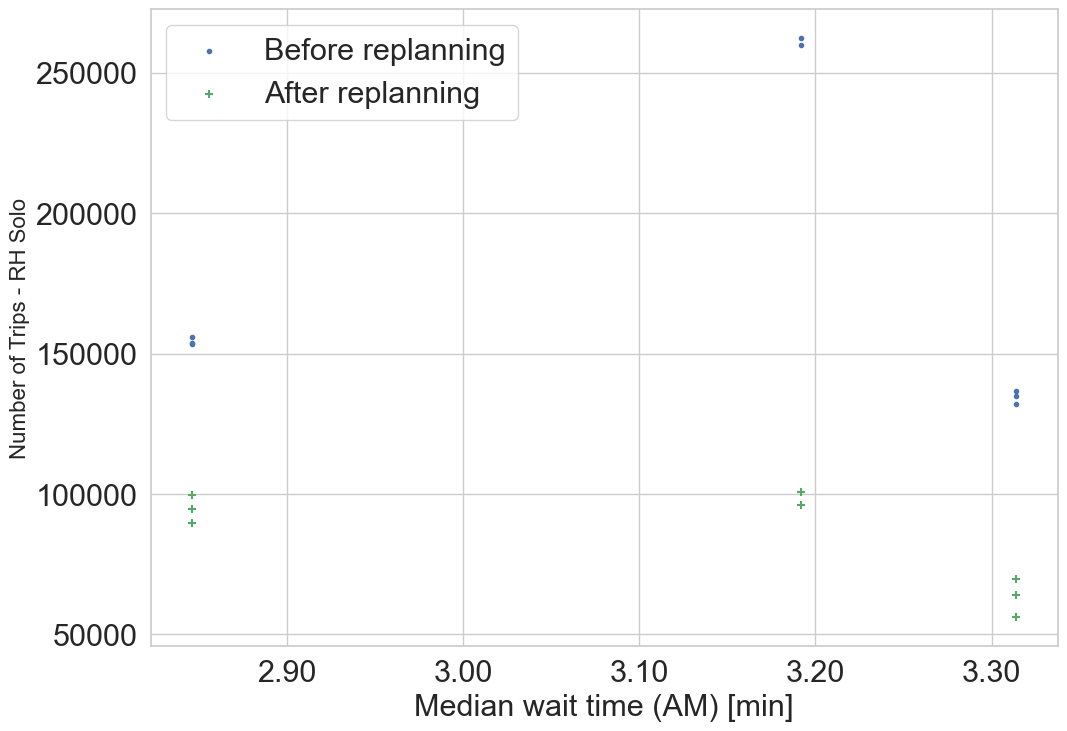

In [84]:
sns.set_style("whitegrid")
plt.rc('legend', fontsize= s1)
plt.rc('xtick', labelsize= s1)    # fontsize of the tick labels
plt.rc('ytick', labelsize= s1)    # fontsize of the tick labels
#plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places


x=constant_size['median_pool']
y=constant_size['Trip Mode Ride Hail']
z=constant_size['Trip Exec Ride Hail']
# multiple lines with legend
plt.scatter(x,y,marker='.', color='b', label= 'Before replanning')
plt.scatter(x,z, marker = '+', color = 'g',label = 'After replanning')
plt.ylabel("Number of Trips - RH Solo", size =16)
plt.xlabel("Median wait time (AM) [min]", size = s1)
plt.savefig('waits/rh_solo_wait_demand.eps')
plt.legend();

In [85]:
#Trip Mode Total and Trip Executed Total

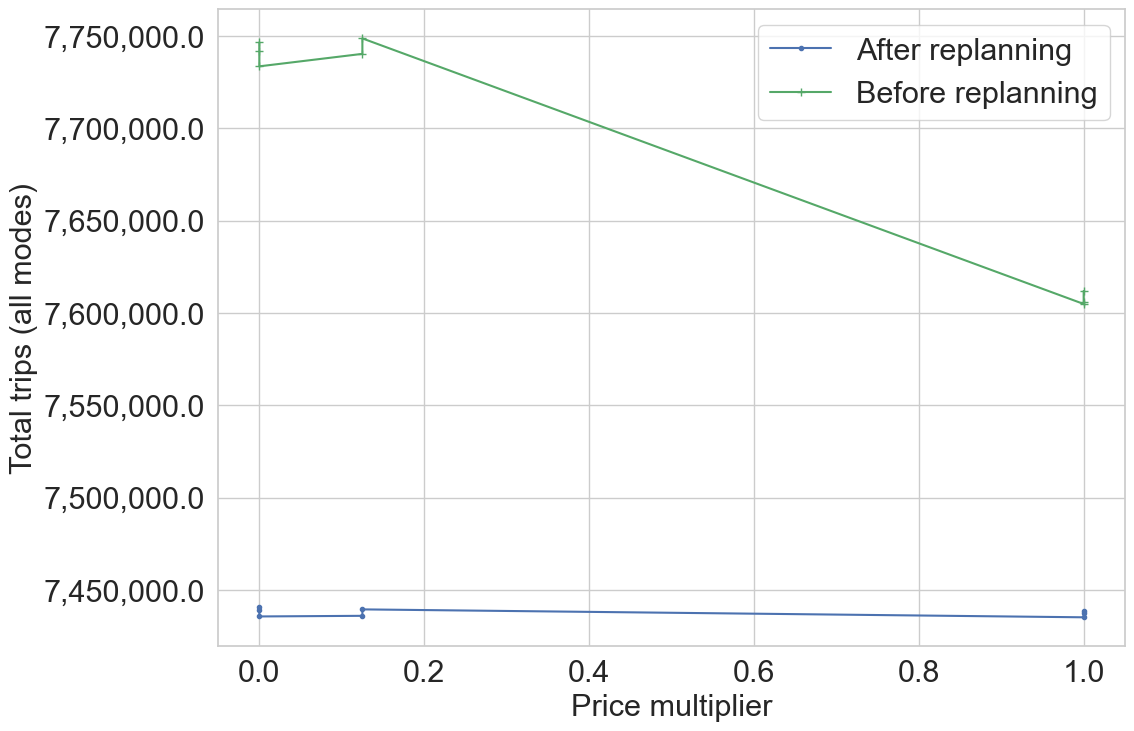

In [99]:
x=constant_size['Price Multiplier']
y=constant_size['Trip Exectuted Total ']
z=constant_size['Trip Mode Total ']

plt.rc('legend', fontsize= s1)
plt.rc('xtick', labelsize= s1)    # fontsize of the tick labels
plt.rc('ytick', labelsize= s1)    # fontsize of the tick labels
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}')) # 2 decimal places
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}')) # 2 decimal places


# multiple lines with legend
plt.plot(x,y,marker='.', markersize=m1, color='b', label= 'After replanning')
plt.plot(x,z, marker = '.', markersize=m1, color = 'g', label = 'Before replanning')
plt.ylabel("Total trips (all modes)", size = s1)
plt.xlabel("Price multiplier", size = s1)
#plt.xticks([0, 0.5, 1, 2, 3, 4, 5, 6, 7, 8])
plt.savefig('other/total_trips_size.eps')
plt.legend();

In [ ]:
x=constant_price['Size Multiplier']
y=constant_price['Trip Exectuted Total ']
z=constant_price['Trip Mode Total ']

plt.rc('legend', fontsize= s1)
plt.rc('xtick', labelsize= s1)    # fontsize of the tick labels
plt.rc('ytick', labelsize= s1)    # fontsize of the tick labels
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.3f}')) # 2 decimal places
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places


# multiple lines with legend
plt.plot(x,y,marker='.', color='r', label= 'After replanning')
plt.plot(x,z, marker = '+', color = 'g', label = 'Before replanning')
plt.ylabel("Total trips (all modes)", size = s1)
plt.xlabel("Fleet size multiplier", size = s1)
plt.xticks([0, 2.5, 5, 10, 15, 20, 25, 27.5, 30])
plt.savefig('other/total_trips_price.eps')
plt.legend();